<font size="3">**Tarea 1 2025**</font>

<u> *Instrucciones* </u>

Su notebook con las respuestas a la tarea se deben entregar a mas tardar el dia 21/04/25 hasta las 21:00, subiendolo al repositorio en la carpeta tareas/2025. 

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La data a utilizar es **machine_failure_data.csv**.

Las variables tienen la siguiente descripcion:

- Date: data medida en frecuencia diaria
- Location: ubicacion del medidor
- Min_Temp: temperatura minima observada
- Max_Temp: temperatura maxima observada
- Leakage: Filtracion medida en el area
- Evaporation: Tasa de evaporacion
- Electricity: Consumo electrico KW
- Parameter#: Diferentes sensores de reportando direccion y velocidad de viento en distintos momentos del dia, asi como otras metricas relevantes.
- Failure today: El sensor reporta fallo (o no)

<u> Preguntas (todas tienen el mismo puntaje): </u> 

1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Cargar la base de datos machine_failure_data.csv en el ambiente. Identifique
los tipos de datos que se encuentran en la base

In [2]:
import pandas as pd

df = pd.read_csv('data/machine_failure_data.csv')
df


Date  Location  Min_Temp  Max_Temp  Leakage  Evaporation  \
0       12/1/2008         3      13.4      22.9      0.6          NaN   
1       12/2/2008         3       7.4      25.1      0.0          NaN   
2       12/3/2008         3      12.9      25.7      0.0          NaN   
3       12/4/2008         3       9.2      28.0      0.0          NaN   
4       12/5/2008         3      17.5      32.3      1.0          NaN   
...           ...       ...       ...       ...      ...          ...   
142188  6/20/2017        42       3.5      21.8      0.0          NaN   
142189  6/21/2017        42       2.8      23.4      0.0          NaN   
142190  6/22/2017        42       3.6      25.3      0.0          NaN   
142191  6/23/2017        42       5.4      26.9      0.0          NaN   
142192  6/24/2017        42       7.8      27.0      0.0          NaN   

        Electricity Parameter1_Dir  Parameter1_Speed Parameter2_9am  ...  \
0               NaN              W              44.0              W  ...   
1               NaN            WNW              44.0            NNW  ...   
2               NaN            WSW              46.0              W  ...   
3               NaN             NE              24.0             SE  ...   
4               NaN              W              41.0            ENE  ...   
...             ...            ...               ...            ...  ...   
142188          NaN              E              31.0            ESE  ...   
142189          NaN              E              31.0             SE  ...   
142190          NaN            NNW              22.0             SE  ...   
142191          NaN              N              37.0             SE  ...   
142192          NaN             SE              28.0            SSE  ...   

       Parameter3_3pm  Parameter4_9am  Parameter4_3pm  Parameter5_9am  \
0                24.0            71.0            22.0          1007.7   
1                22.0            44.0            25.0          1010.6   
2                26.0            38.0            30.0          1007.6   
3                 9.0            45.0            16.0          1017.6   
4                20.0            82.0            33.0          1010.8   
...               ...             ...             ...             ...   
142188           13.0            59.0            27.0          1024.7   
142189           11.0            51.0            24.0          1024.6   
142190            9.0            56.0            21.0          1023.5   
142191            9.0            53.0            24.0          1021.0   
142192            7.0            51.0            24.0          1019.4   

        Parameter5_3pm  Parameter6_9am  Parameter6_3pm  Parameter7_9am  \
0               1007.1             8.0             NaN            16.9   
1               1007.8             NaN             NaN            17.2   
2               1008.7             NaN             2.0            21.0   
3               1012.8             NaN             NaN            18.1   
4               1006.0             7.0             8.0            17.8   
...                ...             ...             ...             ...   
142188          1021.2             NaN             NaN             9.4   
142189          1020.3             NaN             NaN            10.1   
142190          1019.1             NaN             NaN            10.9   
142191          1016.8             NaN             NaN            12.5   
142192          1016.5             3.0             2.0            15.1   

        Parameter7_3pm  Failure_today  
0                 21.8             No  
1                 24.3             No  
2                 23.2             No  
3                 26.5             No  
4                 29.7             No  
...                ...            ...  
142188            20.9             No  
142189            22.4             No  
142190            24.5             No  
142191            26.1             No  
142192           

In [3]:
df.describe()



Location       Min_Temp       Max_Temp        Leakage  \
count  142193.000000  141556.000000  141871.000000  140787.000000   
mean       24.740655      12.186400      23.226784       2.349974   
std        14.237503       6.403283       7.117618       8.465173   
min         1.000000      -8.500000      -4.800000       0.000000   
25%        12.000000       7.600000      17.900000       0.000000   
50%        25.000000      12.000000      22.600000       0.000000   
75%        37.000000      16.800000      28.200000       0.800000   
max        49.000000      33.900000      48.100000     371.000000   

        Evaporation   Electricity  Parameter1_Speed  Parameter3_9am  \
count  81350.000000  74377.000000     132923.000000   140845.000000   
mean       5.469824      7.624853         39.984292       14.001988   
std        4.188537      3.781525         13.588801        8.893337   
min        0.000000      0.000000          6.000000        0.000000   
25%        2.600000      4.900000         31.000000        7.000000   
50%        4.800000      8.500000         39.000000       13.000000   
75%        7.400000     10.600000         48.000000       19.000000   
max      145.000000     14.500000        135.000000      130.000000   

       Parameter3_3pm  Parameter4_9am  Parameter4_3pm  Parameter5_9am  \
count   139563.000000   140419.000000   138583.000000   128179.000000   
mean        18.637576       68.843810       51.482606     1017.653758   
std          8.803345       19.051293       20.797772        7.105476   
min          0.000000        0.000000        0.000000      980.500000   
25%         13.000000       57.000000       37.000000     1012.900000   
50%         19.000000       70.000000       52.000000     1017.600000   
75%         24.000000       83.000000       66.000000     1022.400000   
max         87.000000      100.000000      100.000000     1041.000000   

       Parameter5_3pm  Parameter6_9am  Parameter6_3pm  Parameter7_9am  \
count   128212.000000    88536.000000    85099.000000   141289.000000   
mean      1015.258204        4.437189        4.503167       16.987509   
std          7.036677        2.887016        2.720633        6.492838   
min        977.100000        0.000000        0.000000       -7.200000   
25%       1010.400000        1.000000        2.000000       12.300000   
50%       1015.200000        5.000000        5.000000       16.700000   
75%       1020.000000        7.000000        7.000000       21.600000   
max       1039.600000        9.000000        9.000000       40.200000   

       Parameter7_3pm  
count   139467.000000  
mean        21.687235  
std          6.937594  
min         -5.400000  
25%         16.600000  
50%         21.100000  
75%         26.400000  
max         46.700000

In [4]:
print(df.columns.tolist())

['Date', 'Location', 'Min_Temp', 'Max_Temp', 'Leakage', 'Evaporation', 'Electricity', 'Parameter1_Dir', 'Parameter1_Speed', 'Parameter2_9am', 'Parameter2_3pm', 'Parameter3_9am', 'Parameter3_3pm', 'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm', 'Parameter6_9am', 'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm', 'Failure_today']


In [5]:
# Ver los valores únicos de la columna 'Failure_today'
print("Valores únicos en df_l['Failure_today']:")
print(df['Failure_today'].unique())

Valores únicos en df_l['Failure_today']:
['No' 'Yes' nan]


In [6]:
# Identificar columnas con valores NaN y contar la cantidad de NaNs en cada columna
nan_columns = df.isna().sum()

# Filtrar solo las columnas que tienen al menos un NaN
nan_columns = nan_columns[nan_columns > 0]

# Mostrar las columnas y la cantidad de NaNs
print("Columnas con valores NaN y su cantidad:")
print(nan_columns)

Columnas con valores NaN y su cantidad:
Min_Temp              637
Max_Temp              322
Leakage              1406
Evaporation         60843
Electricity         67816
Parameter1_Dir       9330
Parameter1_Speed     9270
Parameter2_9am      10013
Parameter2_3pm       3778
Parameter3_9am       1348
Parameter3_3pm       2630
Parameter4_9am       1774
Parameter4_3pm       3610
Parameter5_9am      14014
Parameter5_3pm      13981
Parameter6_9am      53657
Parameter6_3pm      57094
Parameter7_9am        904
Parameter7_3pm       2726
Failure_today        1406
dtype: int64


In [7]:

print("Valores únicos y su frecuencia en 'Evaporation':")
print(df['Evaporation'].value_counts(dropna=False))

Valores únicos y su frecuencia en 'Evaporation':
NaN     60843
4.0      3282
8.0      2574
2.2      2057
2.0      1996
        ...  
44.4        1
44.0        1
50.4        1
35.8        1
39.6        1
Name: Evaporation, Length: 357, dtype: int64


In [8]:
# Ver los valores únicos de la columna 'Leakage' y su frecuencia
print("Valores únicos y su frecuencia en 'Electricity':")
print(df['Electricity'].value_counts(dropna=False))

Valores únicos y su frecuencia en 'Electricity':
NaN     67816
0.0      2308
10.7     1087
11.0     1078
10.8     1058
        ...  
14.0       15
14.1        6
14.3        4
14.2        2
14.5        1
Name: Electricity, Length: 146, dtype: int64


# Tratamiento de valores NaN en el dataset

1)Electricity y Evaporation:
Identificamos que estos parámetros requerían un enfoque especial. Decidimos crear una columna binaria para cada uno, donde:

    -1 indica la presencia de un valor NaN

    -0 indica que hay un valor numérico registrado.

2)Parámetro 6:
    Debido a la alta cantidad de valores NaN y a la falta de un método claro para imputarlos, optamos por excluir esta variable de los análisis para las preguntas 2, 3 y 4.

3)Otras variables categóricas:
    Como el número de valores NaN en estas variables era bajo, procedimos a eliminarlos. Esta estrategia nos permitió mantener la mayor integridad posible de los datos para el resto del análisis.

Este enfoque busca equilibrar el manejo de datos faltantes con la preservación de la calidad y utilidad del dataset.

In [9]:
import pandas as pd

# Suponiendo que tu DataFrame se llama df
df_1 = df.copy()

# 2. Eliminar las filas con NaN en las otras columnas (excepto Evaporation y Electricity)
columnas_a_limpiar = [
    'Min_Temp', 'Max_Temp', 'Leakage',
    'Parameter1_Dir', 'Parameter1_Speed',
    'Parameter2_9am', 'Parameter2_3pm',
    'Parameter3_9am', 'Parameter3_3pm',
    'Parameter4_9am', 'Parameter4_3pm',
    'Parameter5_9am', 'Parameter5_3pm',
    'Parameter7_9am', 'Parameter7_3pm',
    'Failure_today'
]

df_1 = df_1.dropna(subset=columnas_a_limpiar)


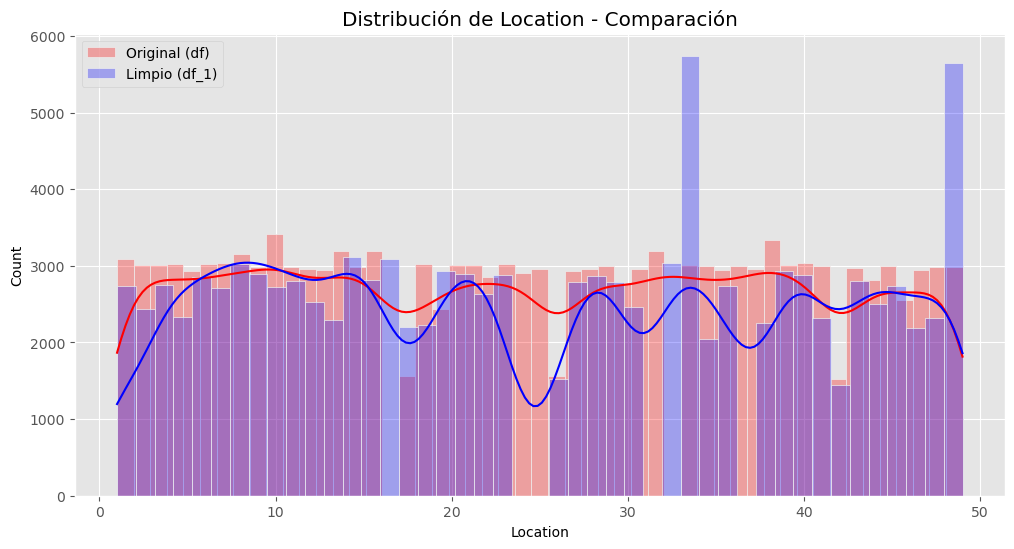

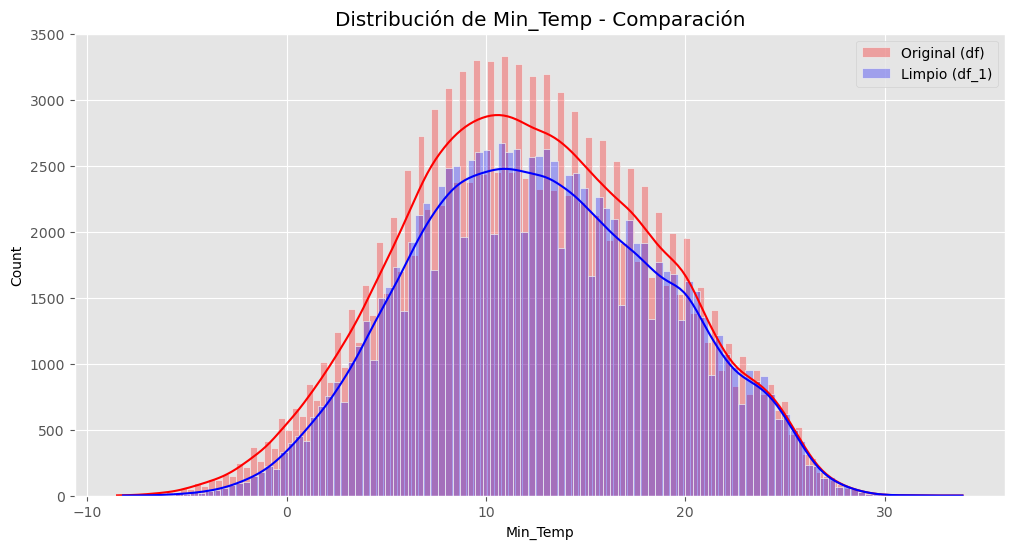

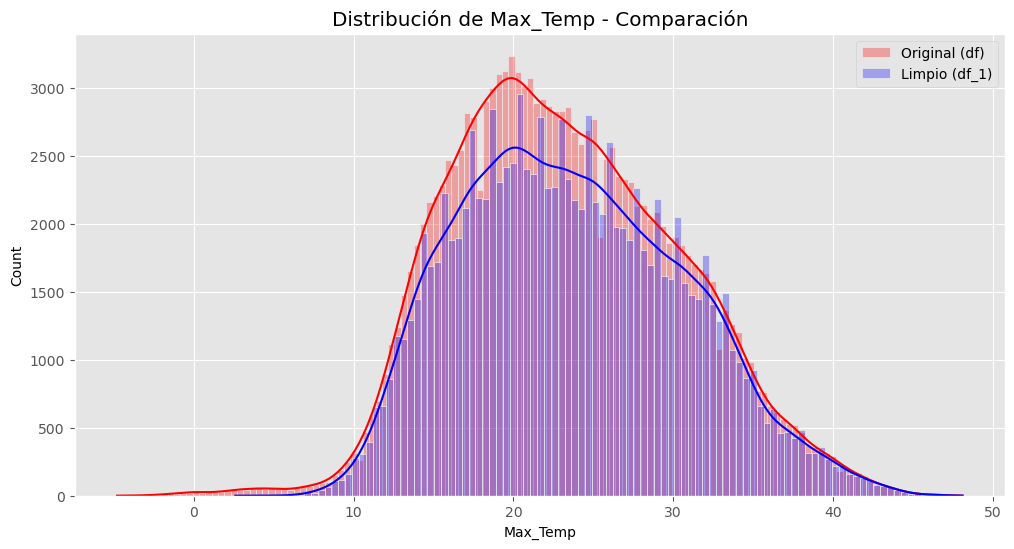

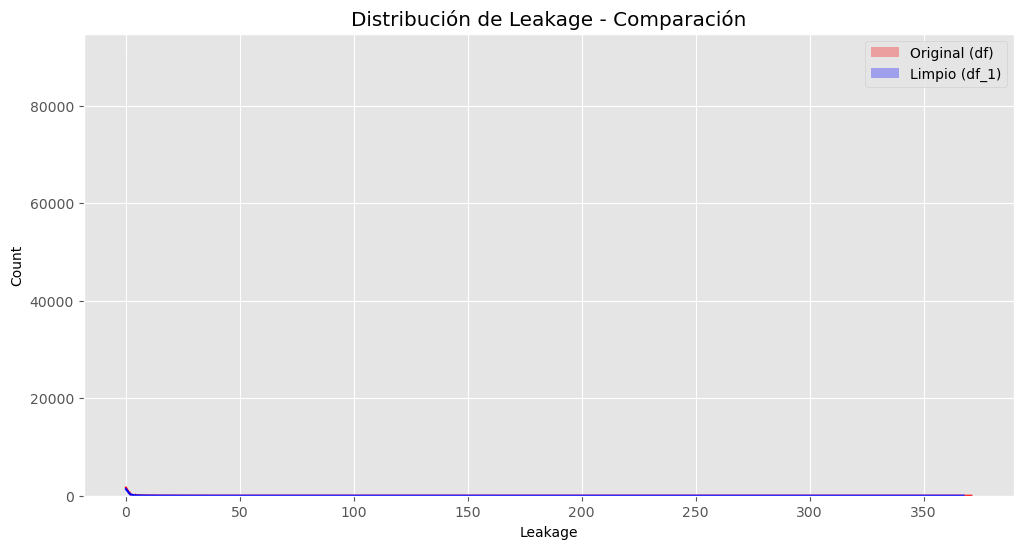

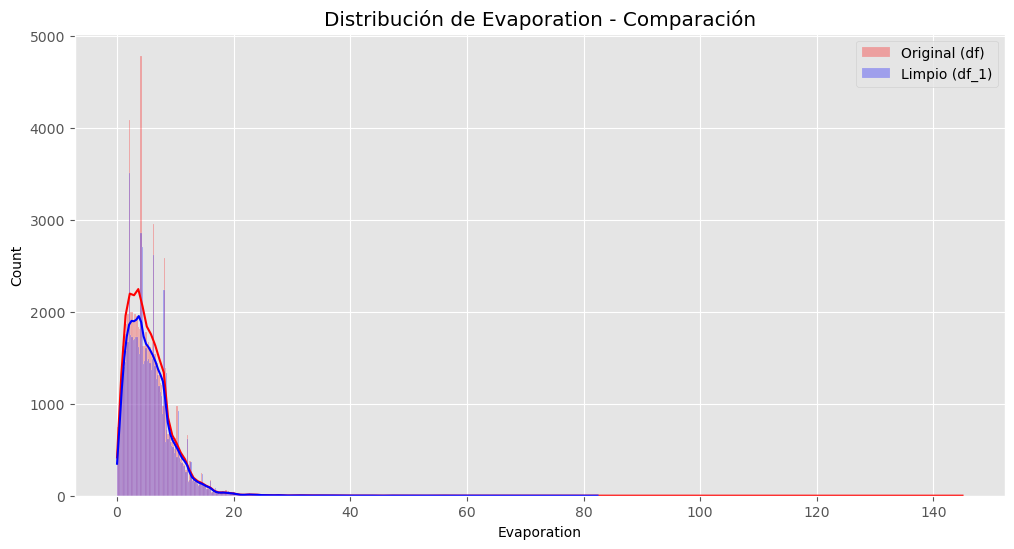

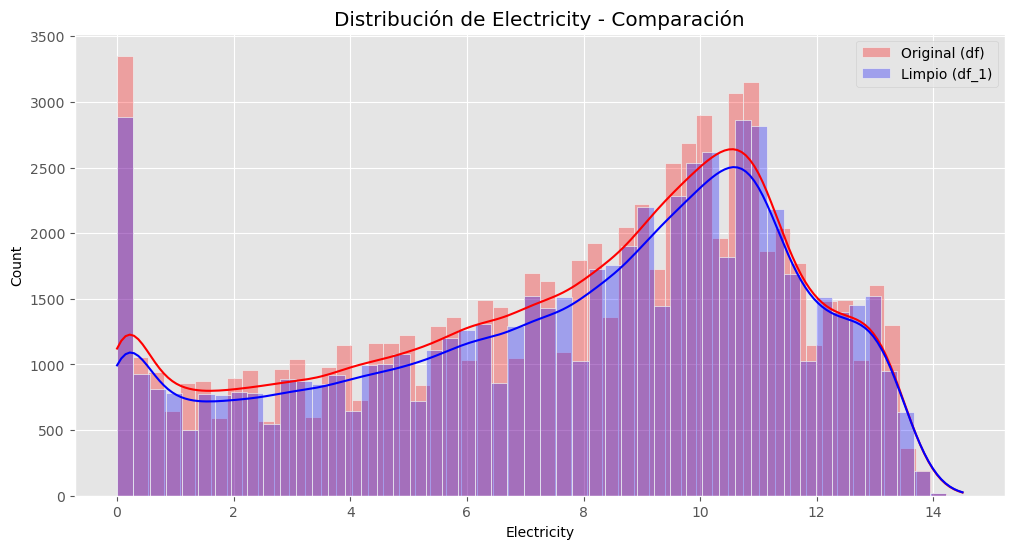

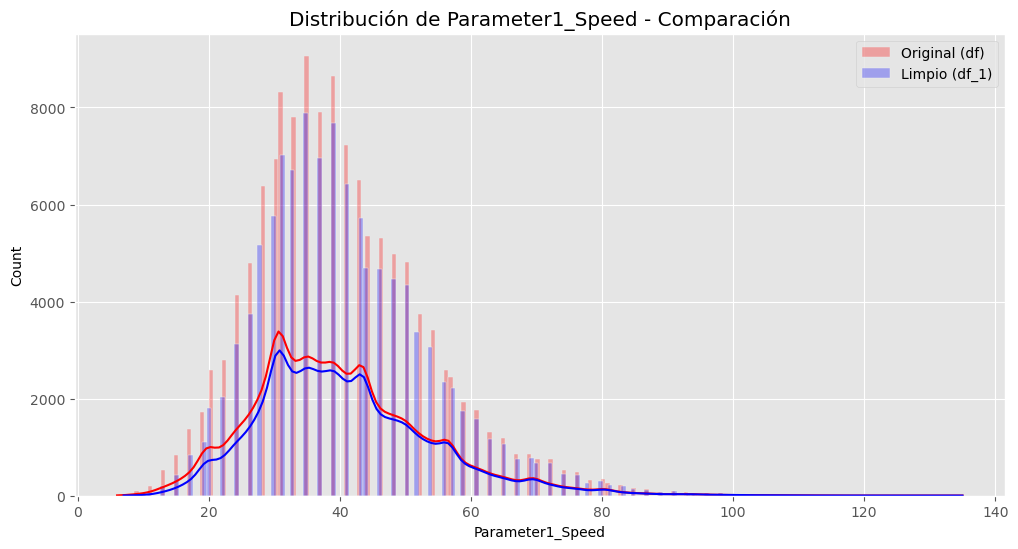

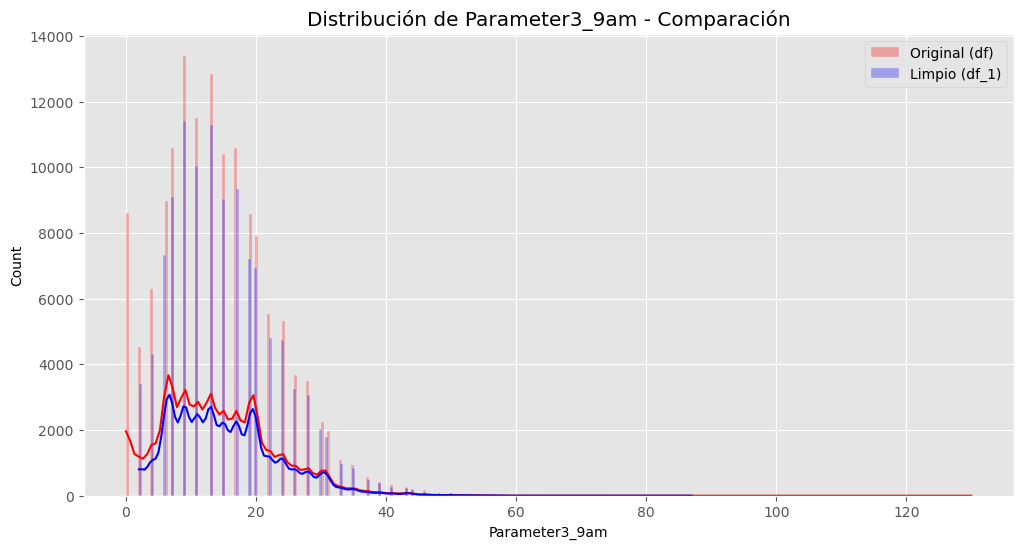

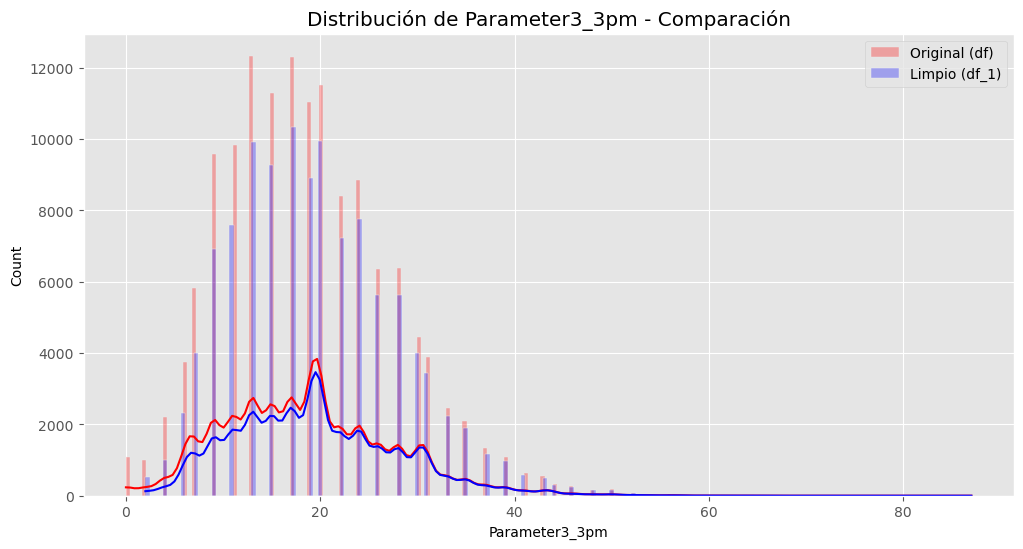

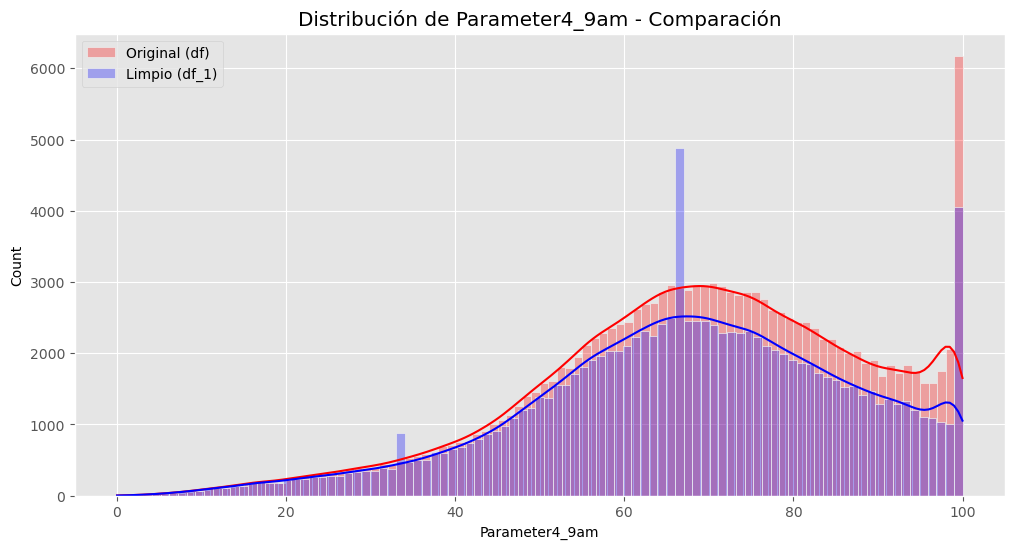

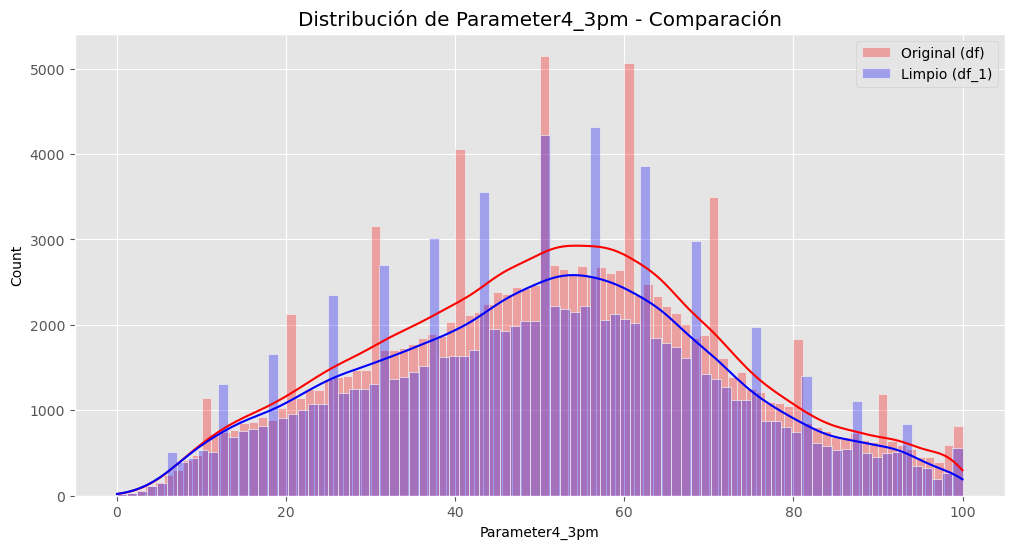

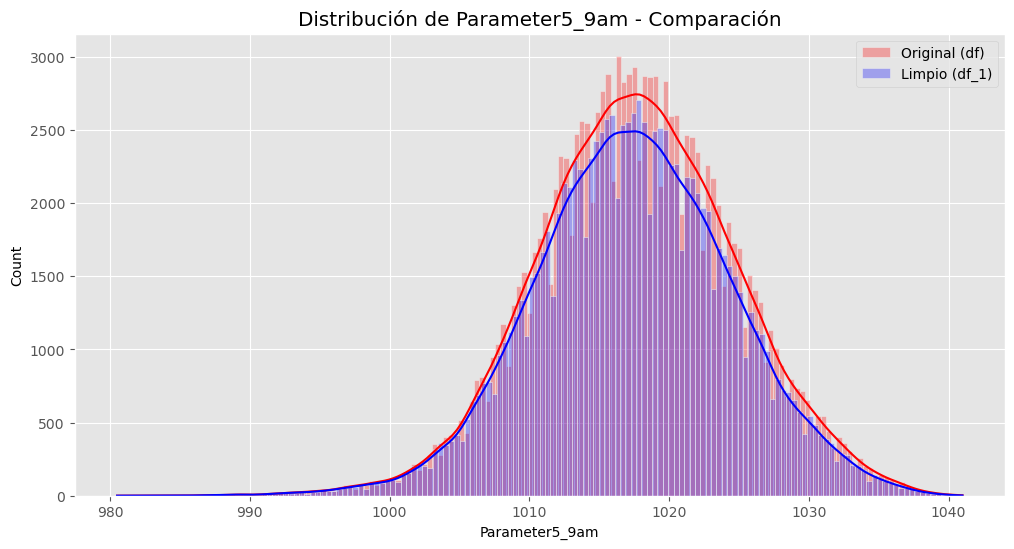

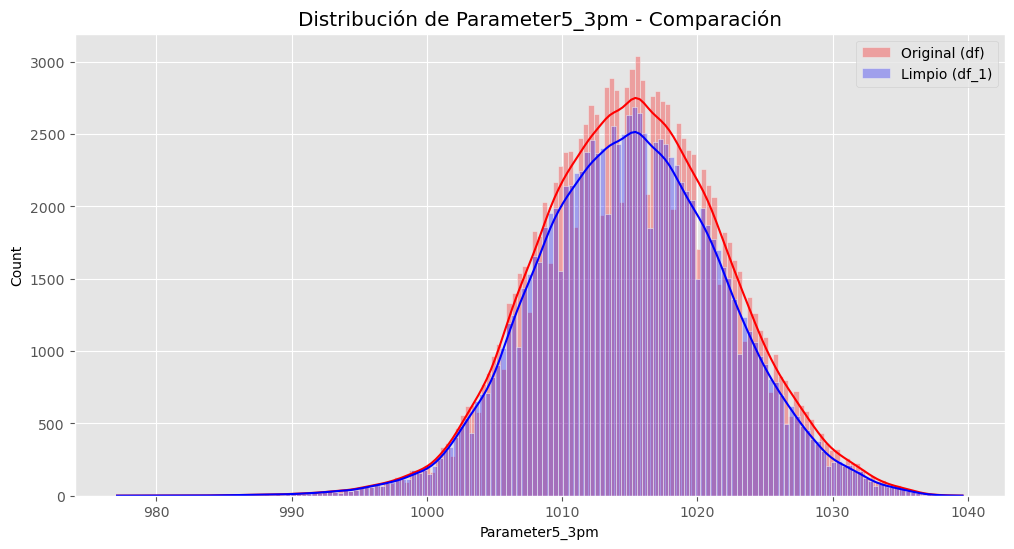

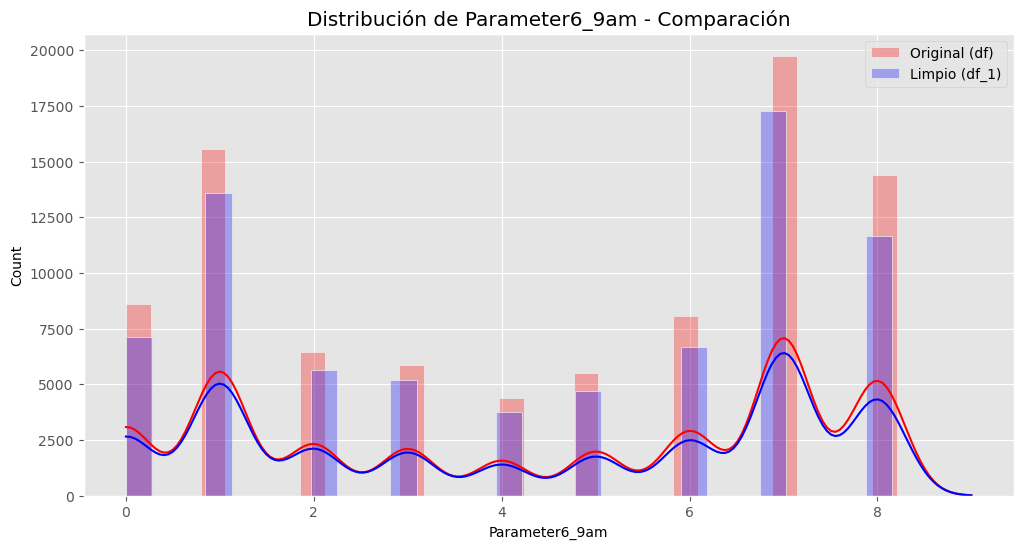

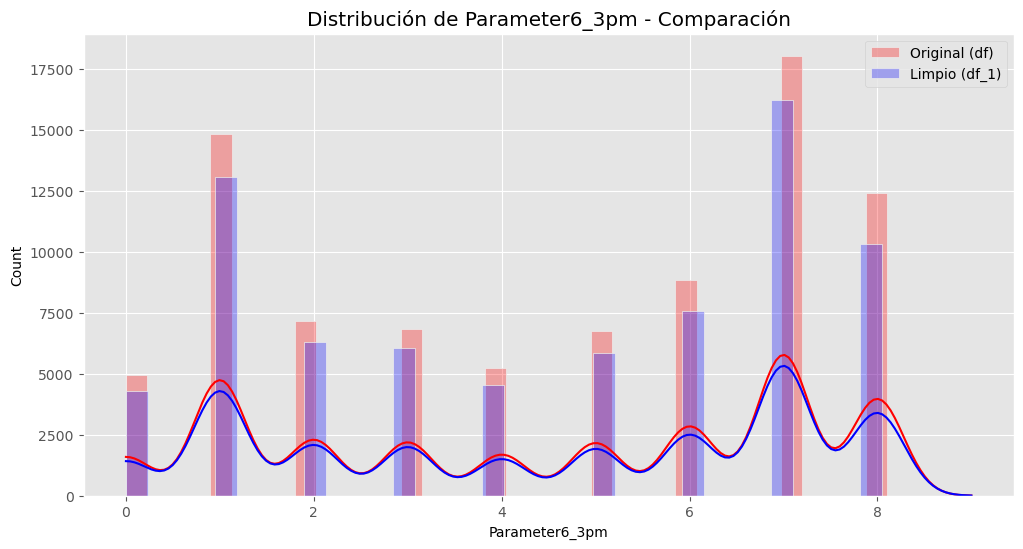

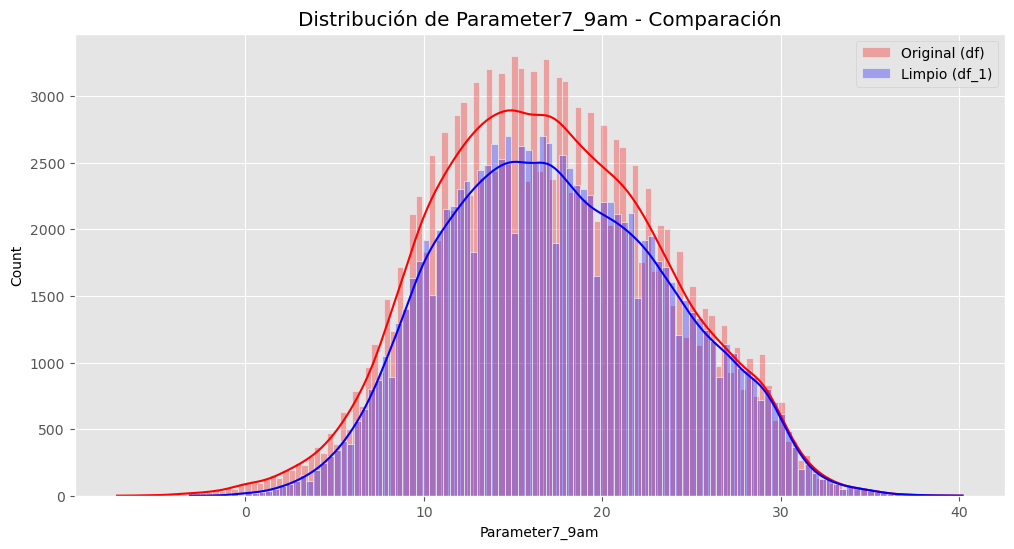

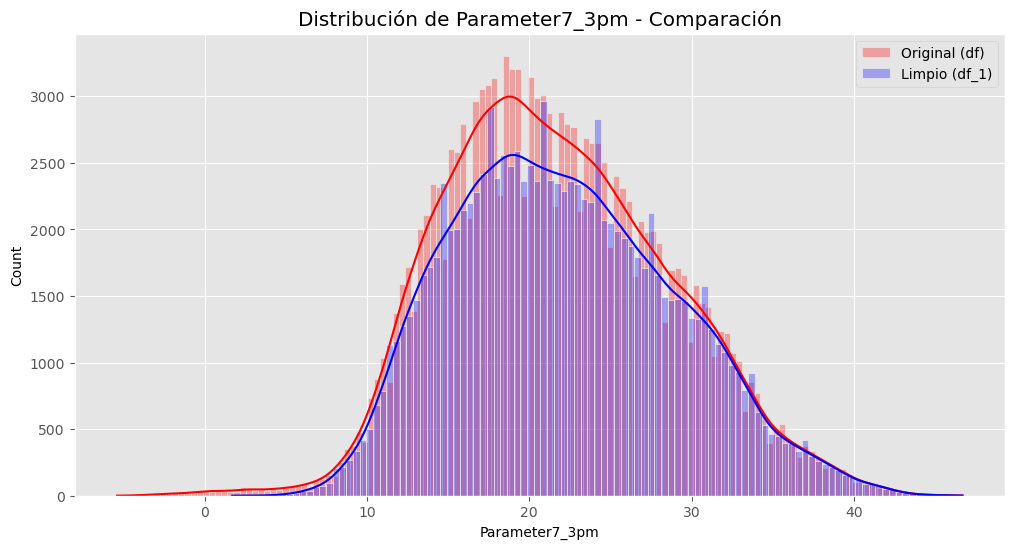

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración inicial
plt.style.use('ggplot')
figsize = (12, 6)

# Seleccionar solo columnas numéricas para la comparación
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Gráficos de distribución para cada variable numérica
for col in numeric_cols:
    plt.figure(figsize=figsize)
    
    # Histograma y KDE para df (no limpio)
    sns.histplot(df[col], kde=True, color='red', alpha=0.3, label='Original (df)')
    
    # Histograma y KDE para df_1 (limpio)
    sns.histplot(df_1[col], kde=True, color='blue', alpha=0.3, label='Limpio (df_1)')
    
    plt.title(f'Distribución de {col} - Comparación')
    plt.legend()
    plt.show()

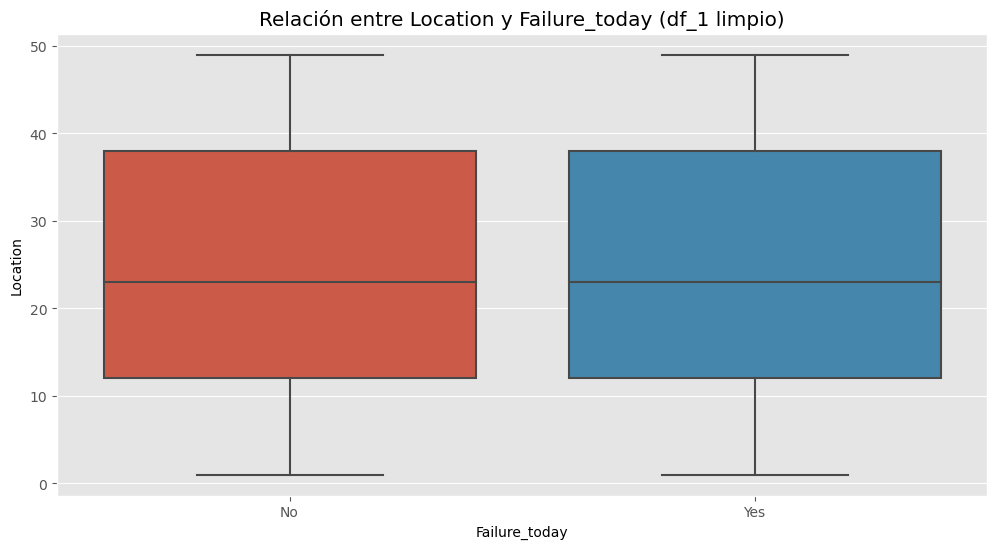

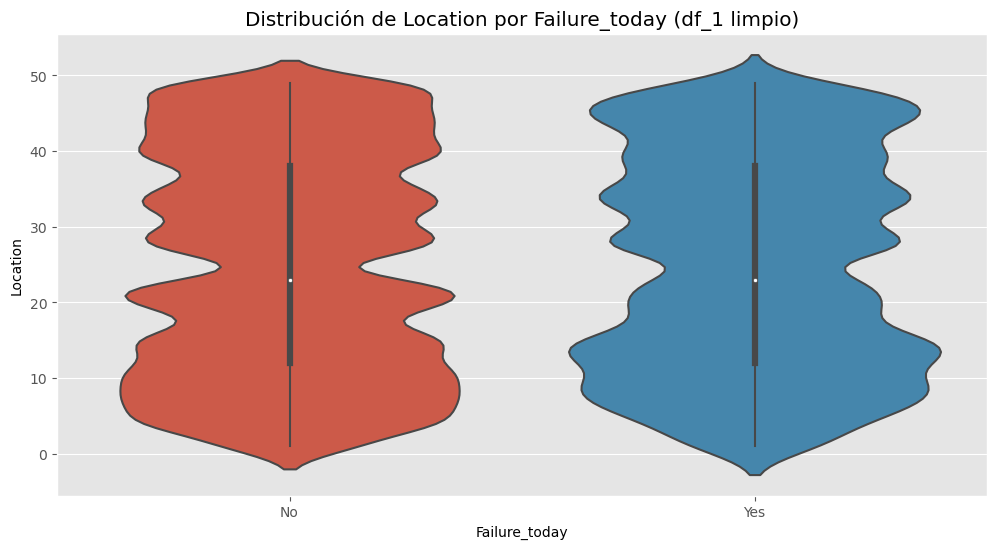

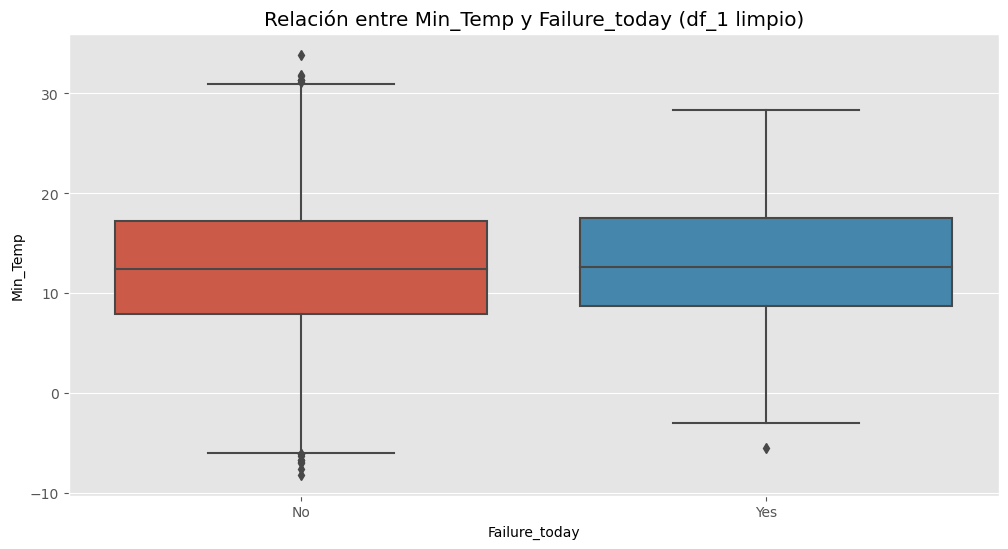

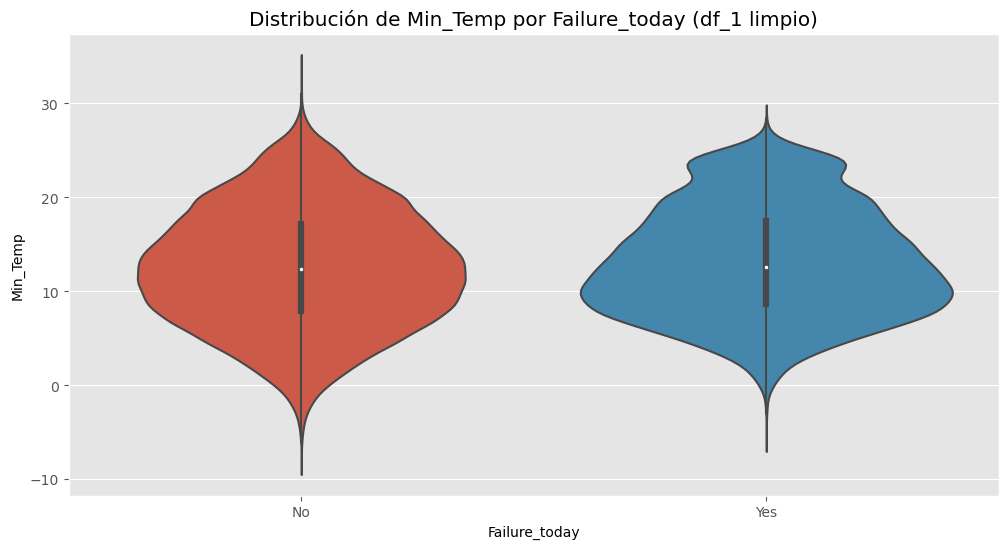

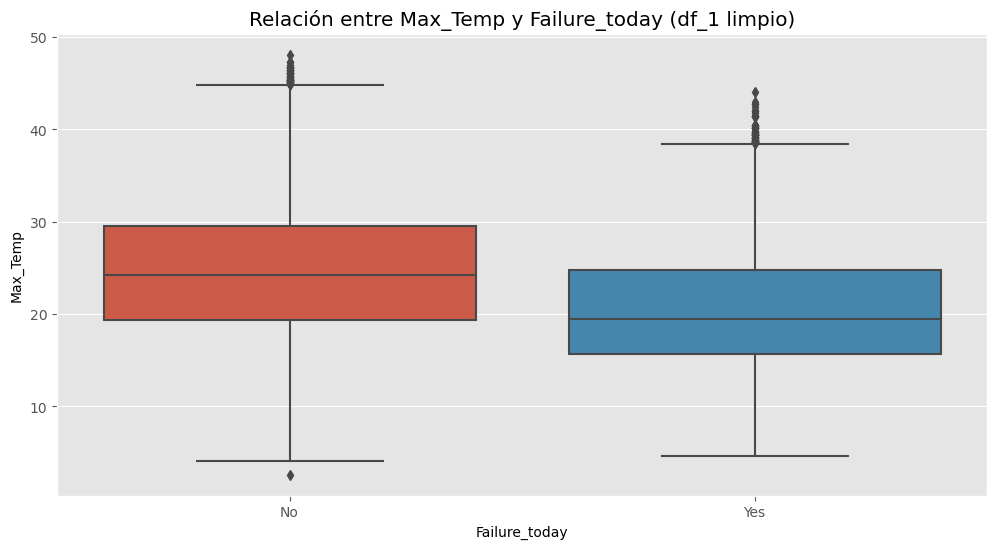

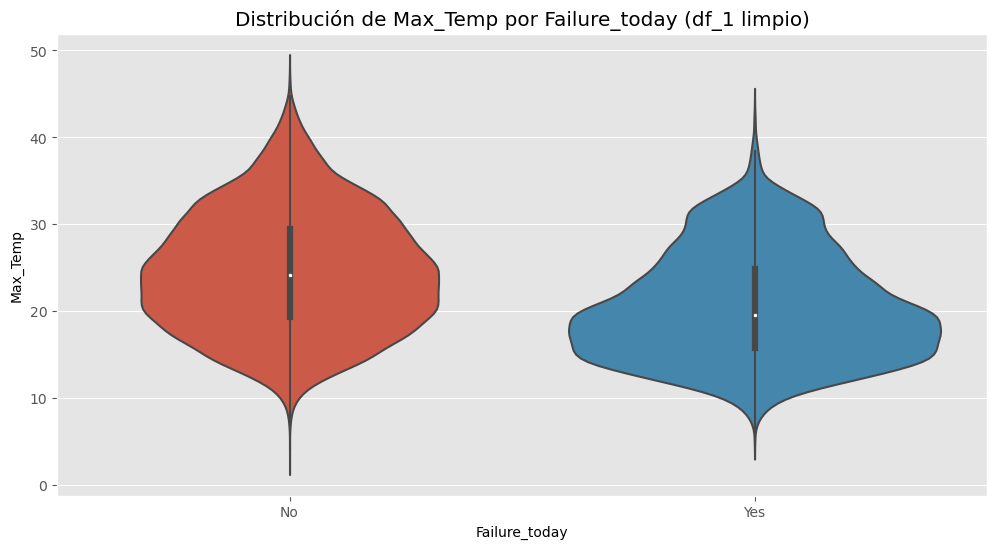

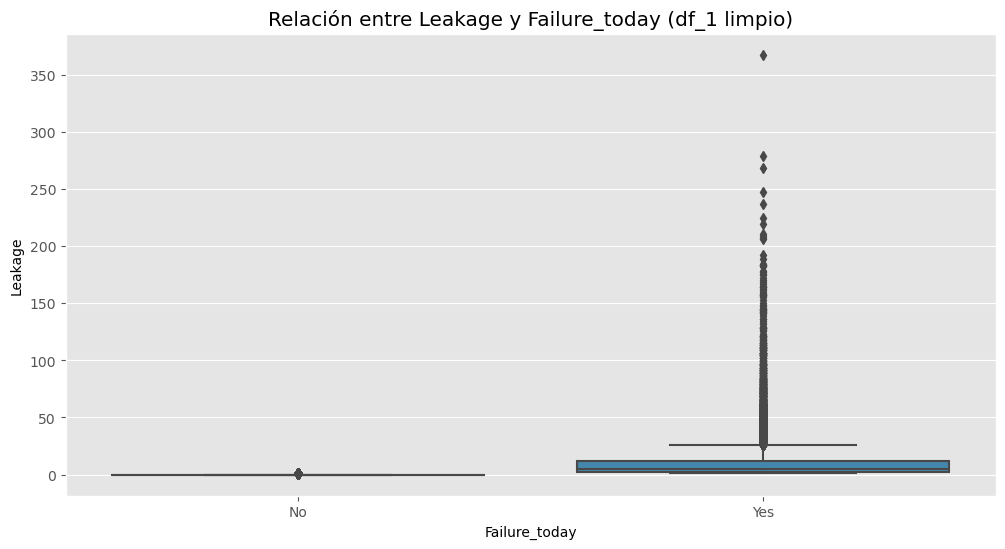

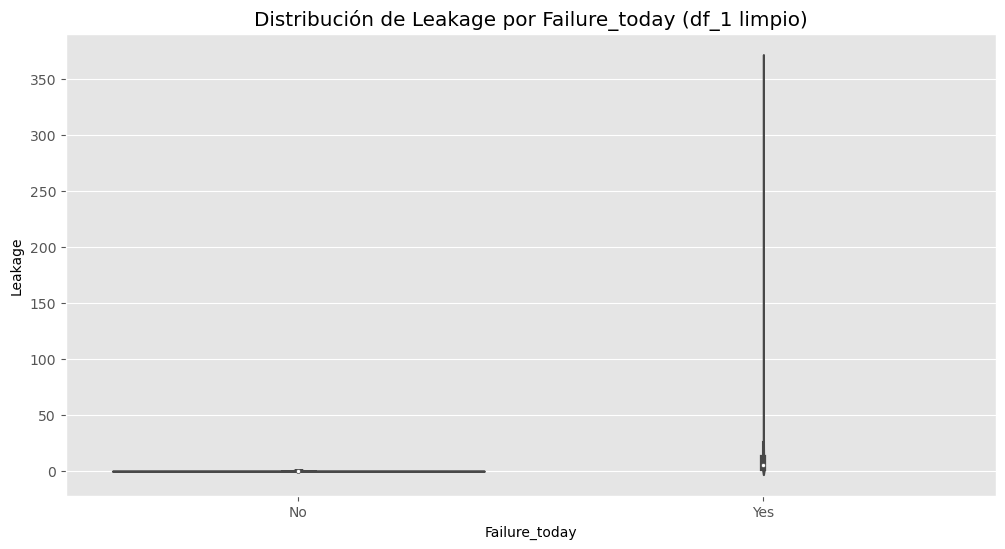

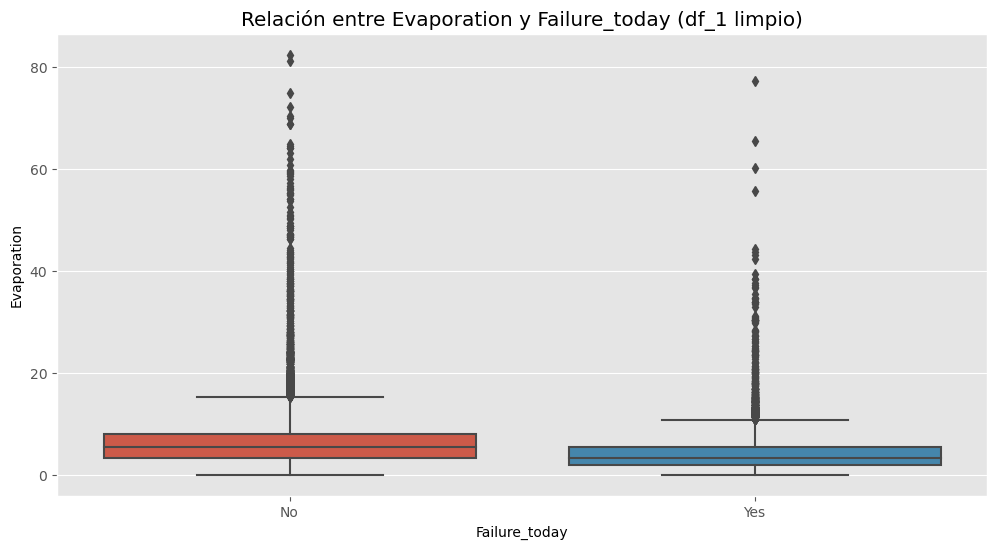

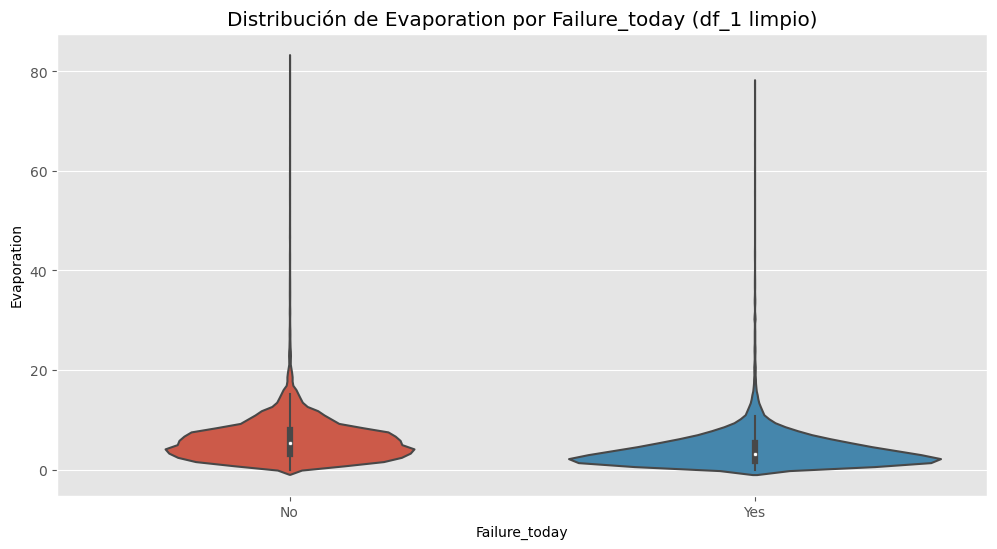

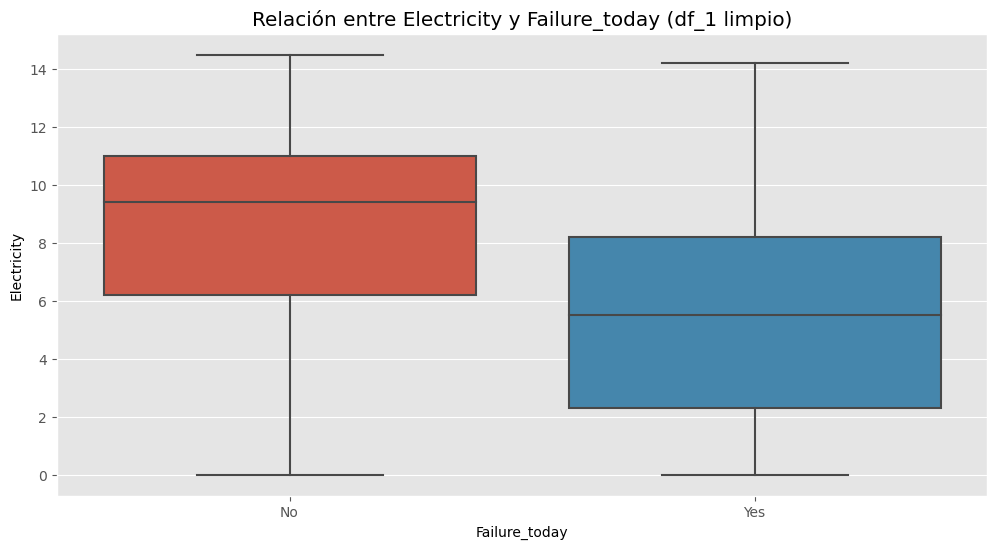

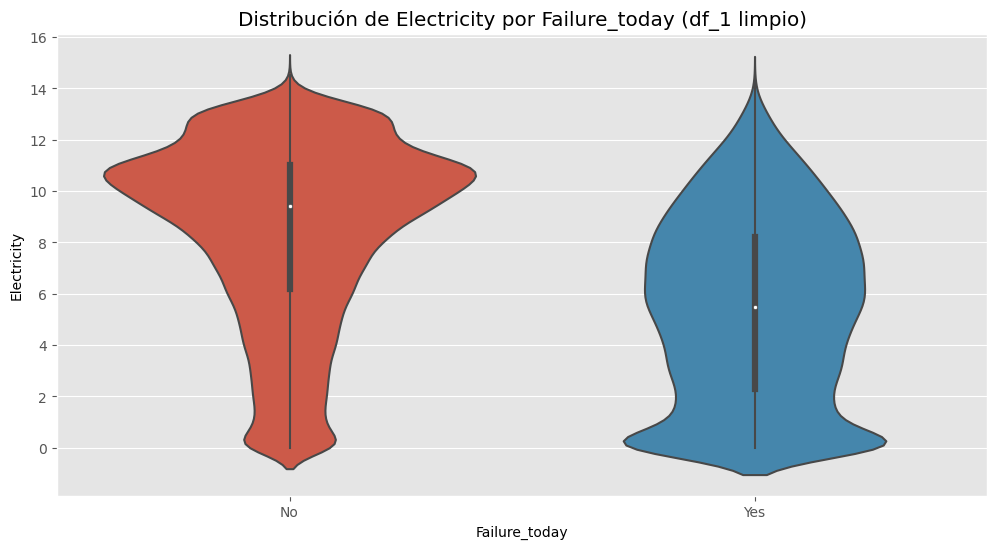

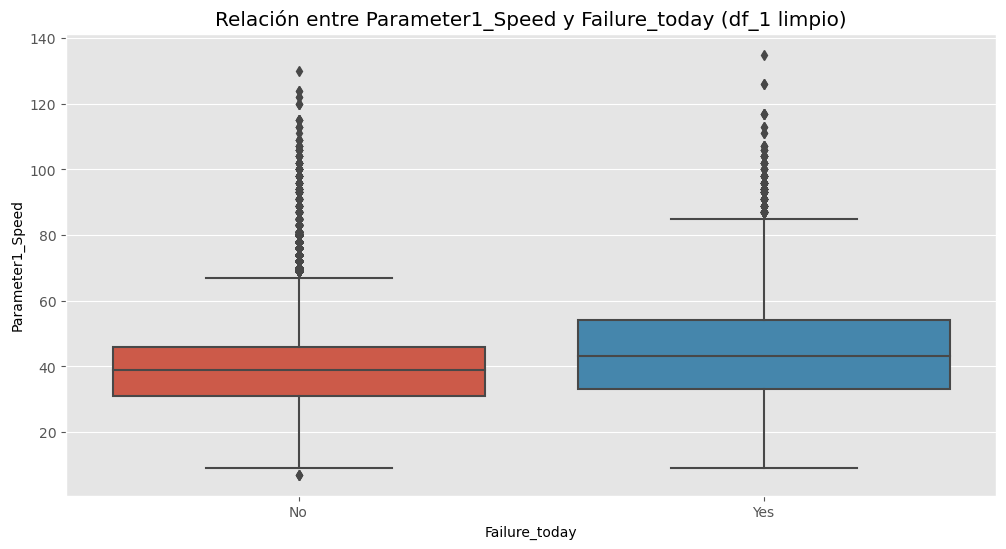

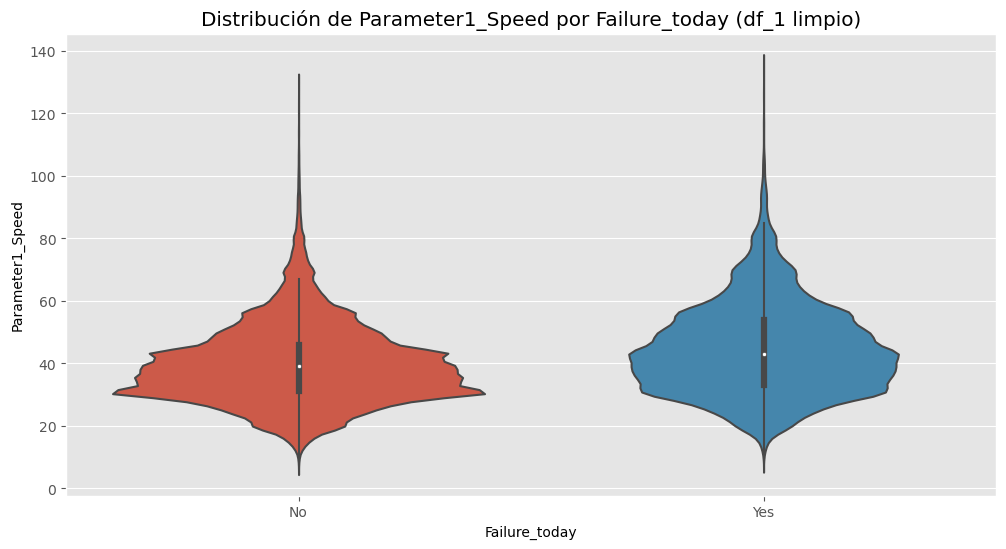

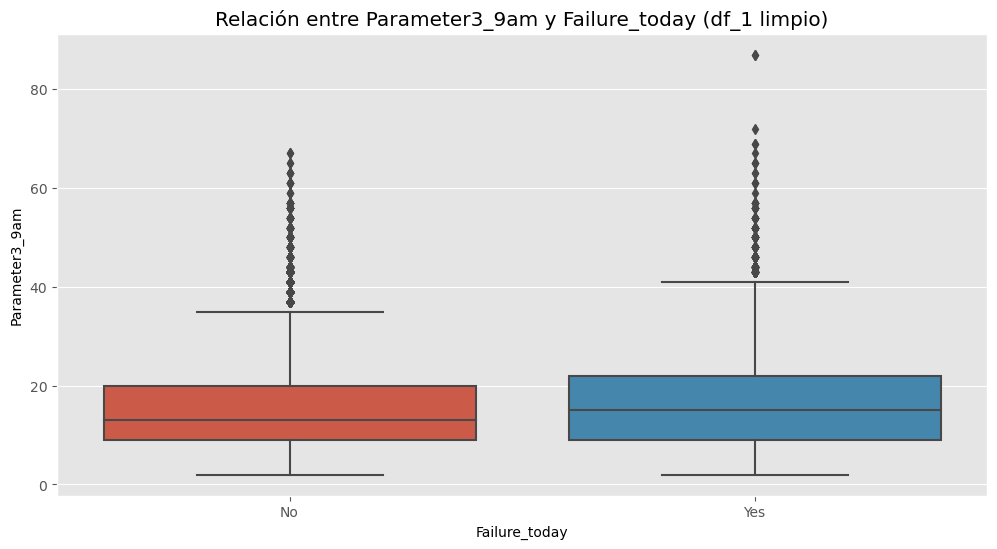

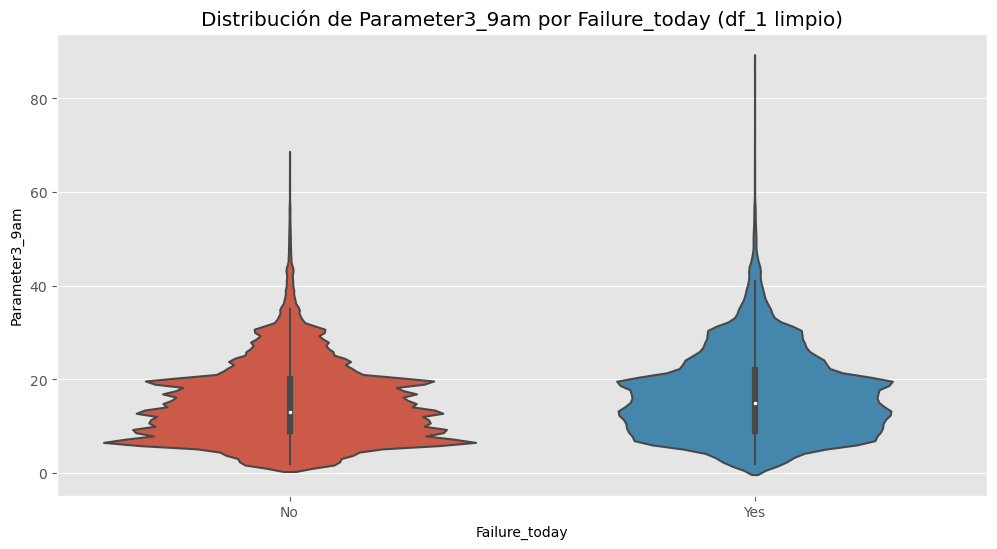

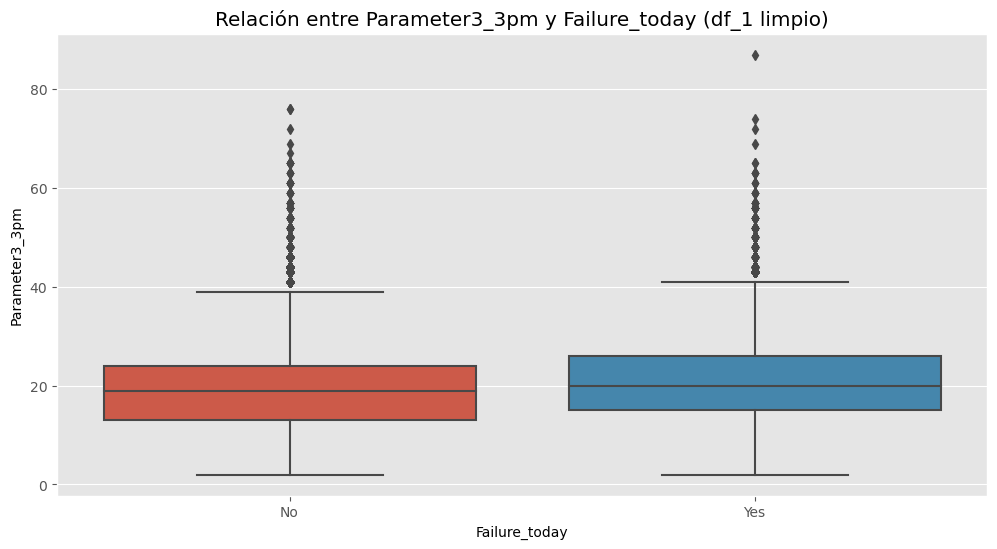

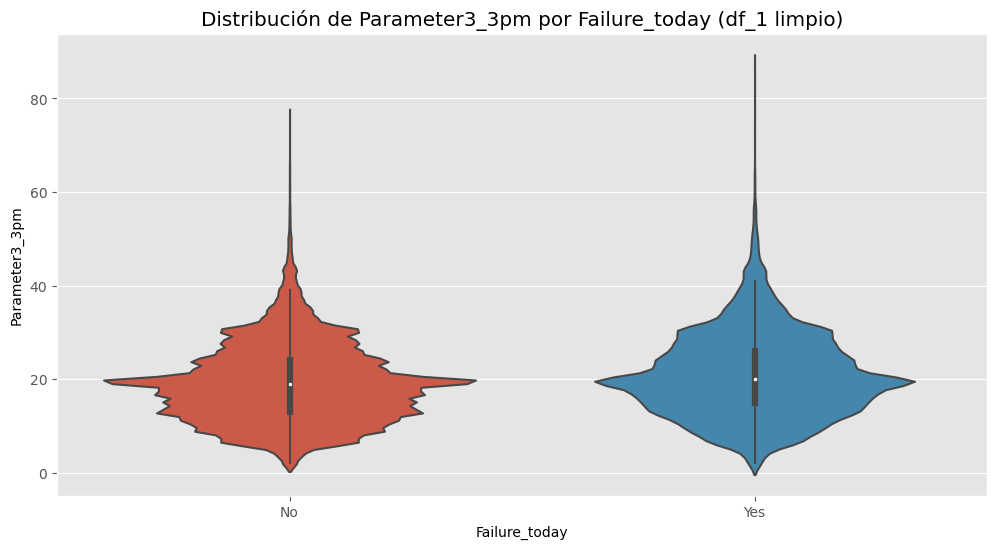

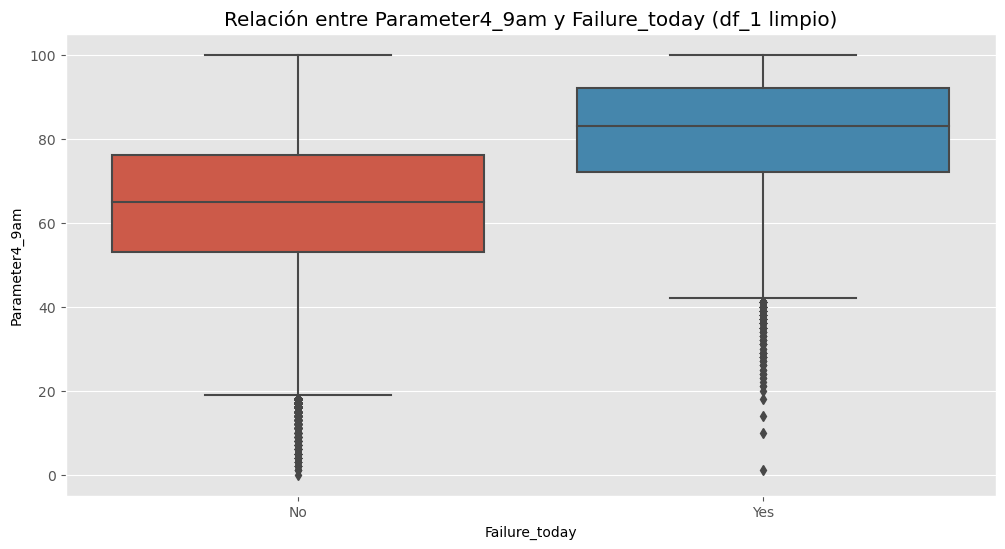

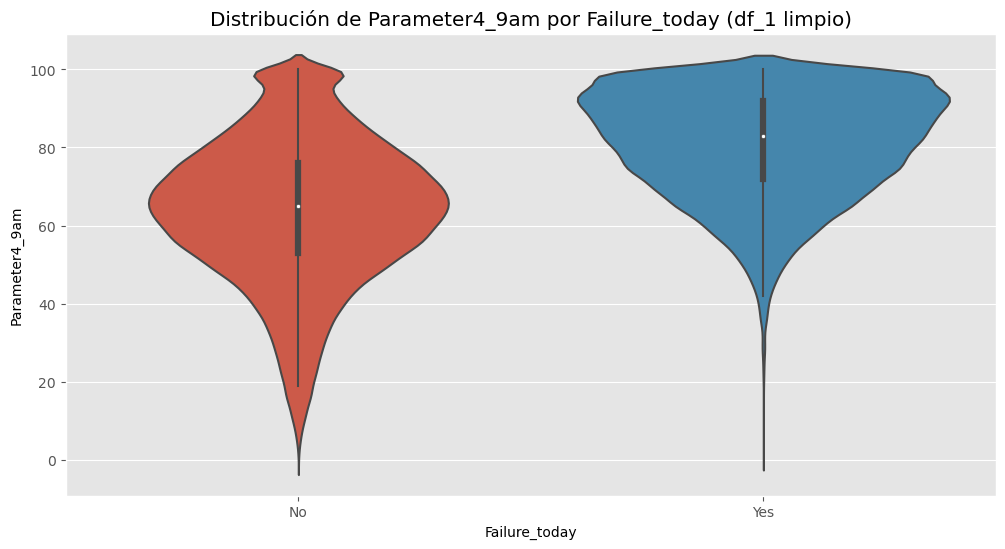

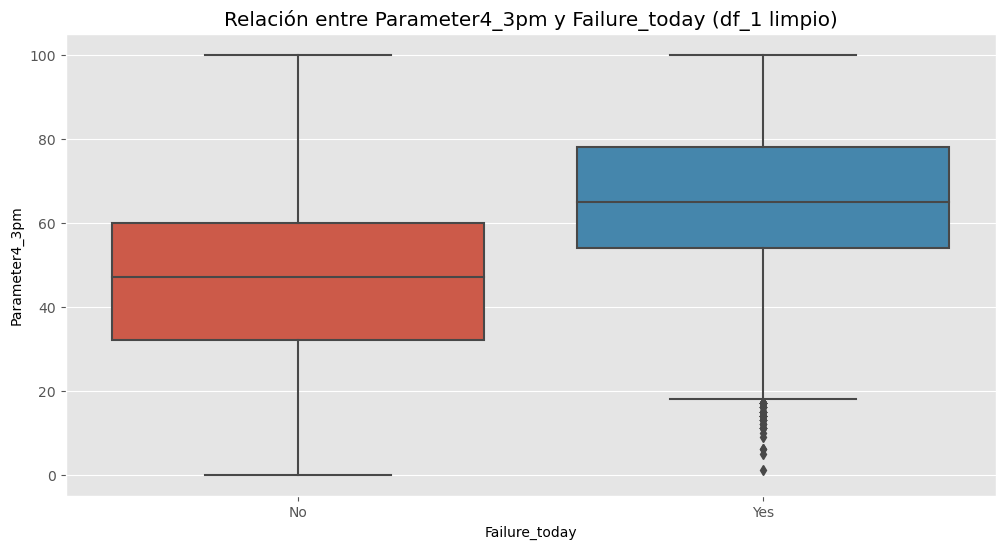

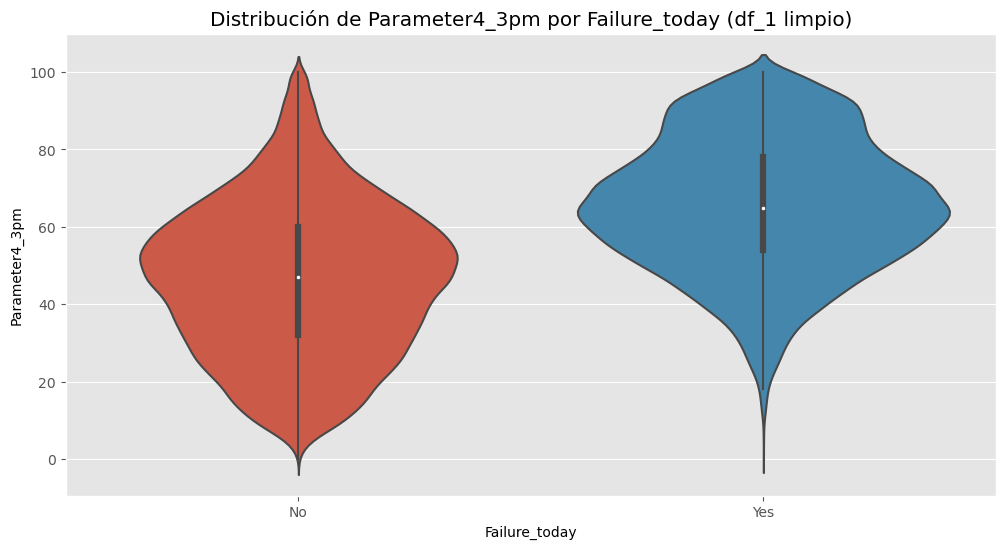

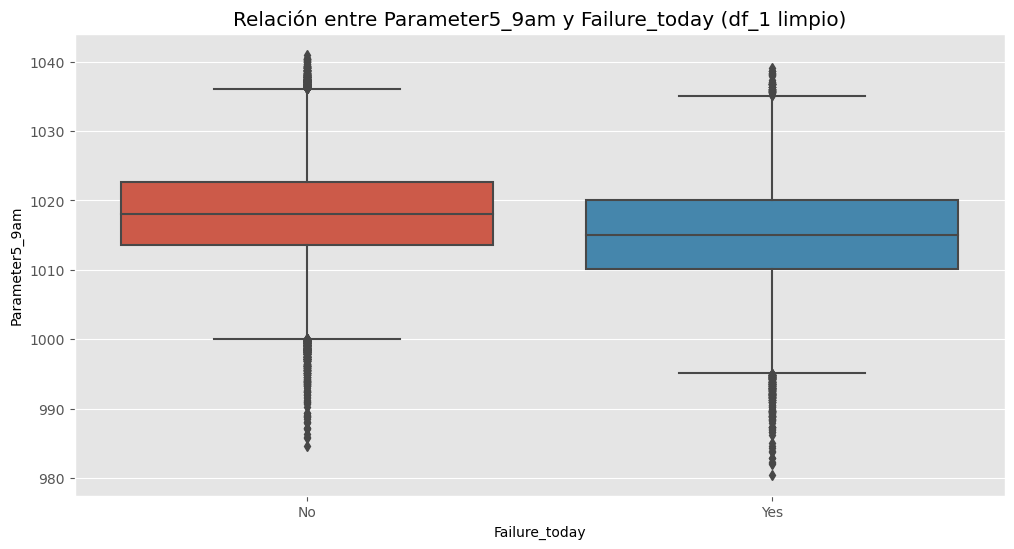

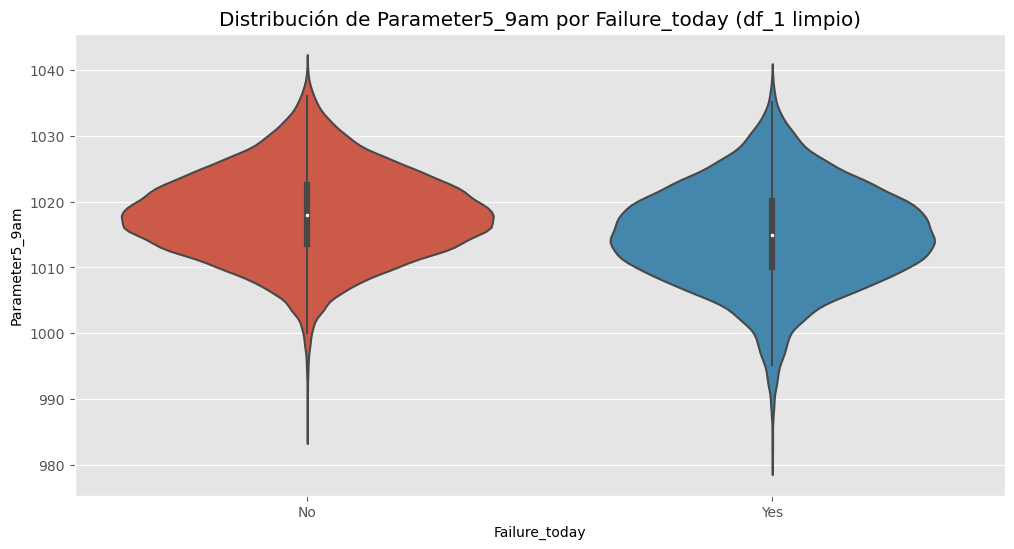

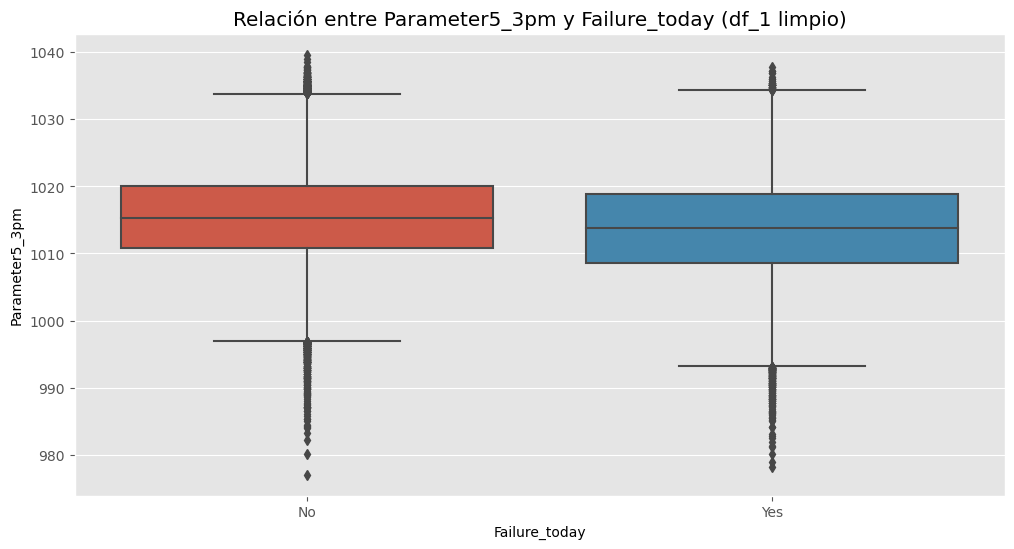

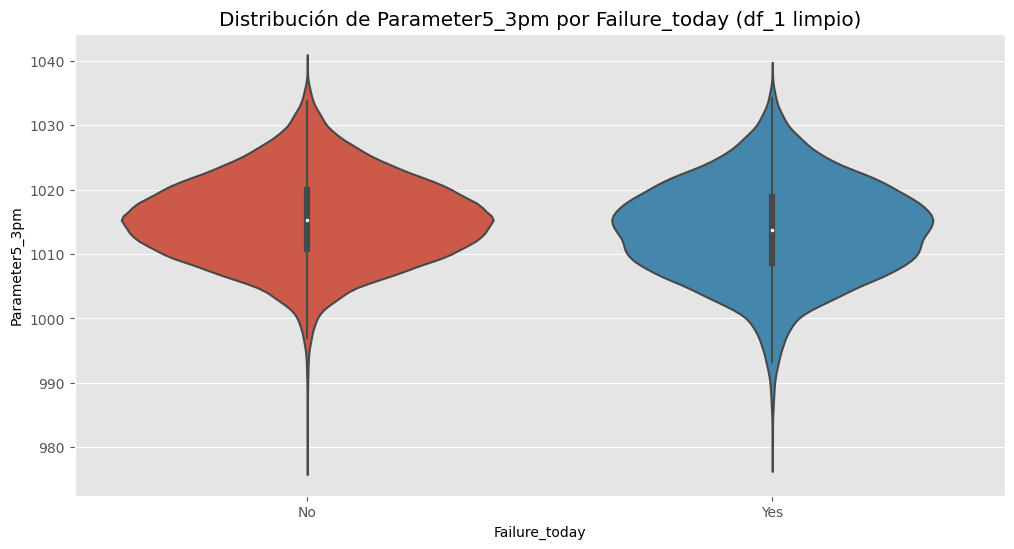

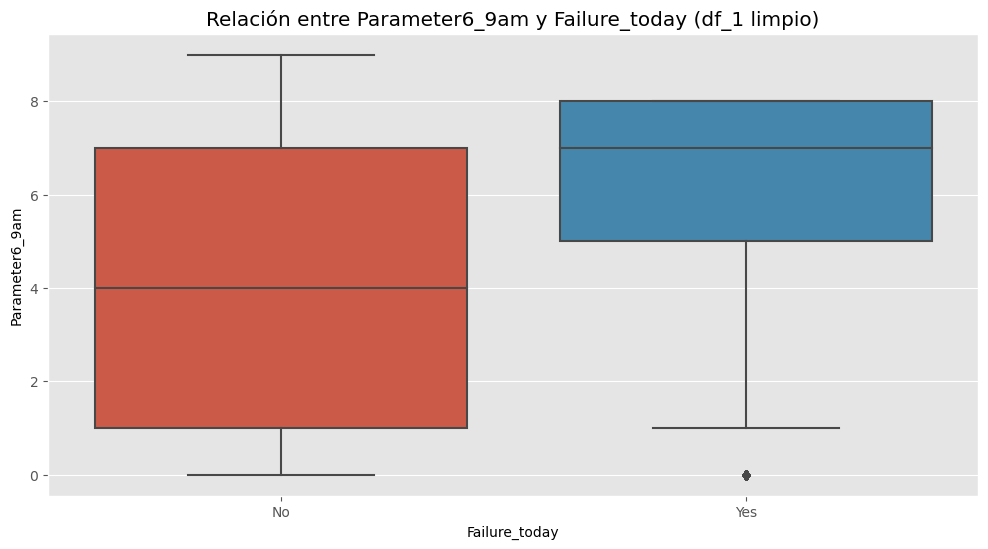

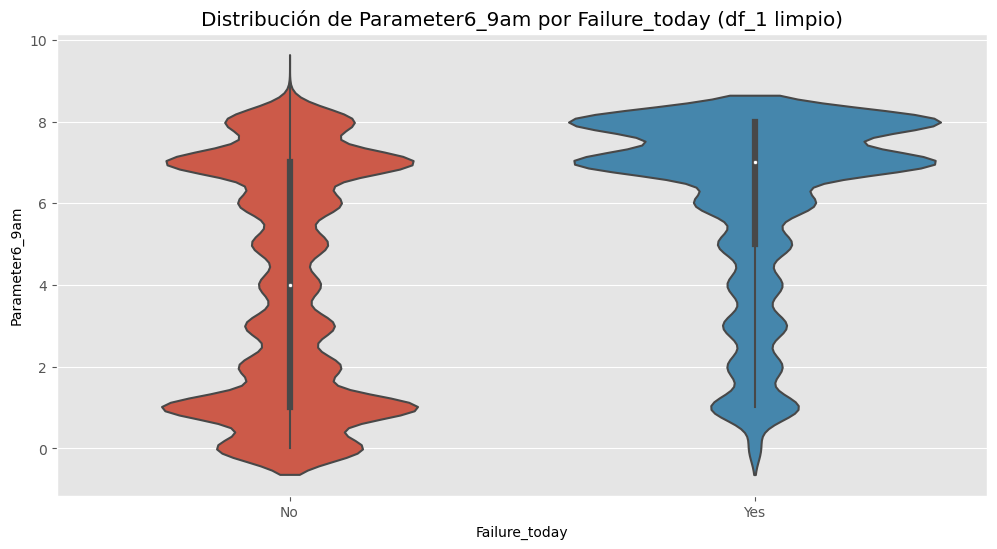

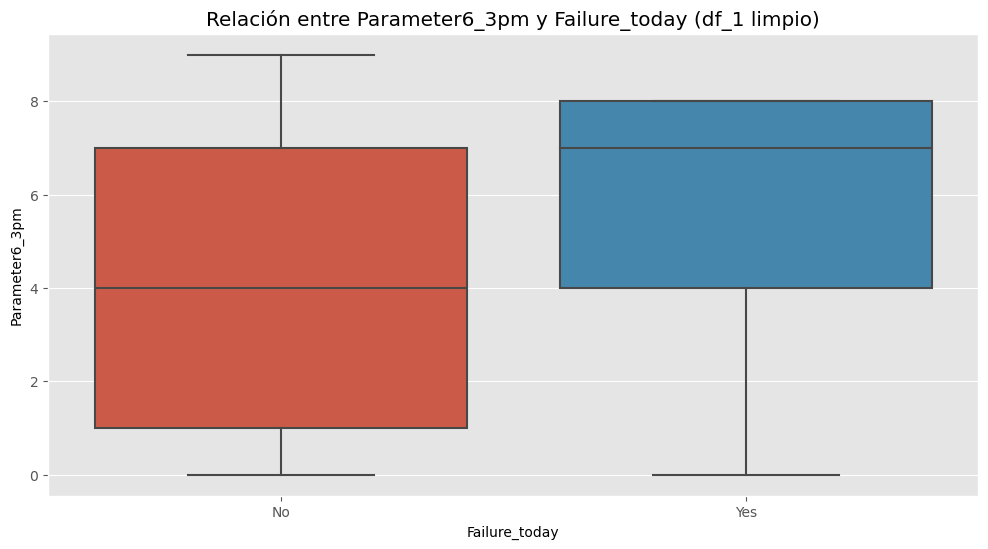

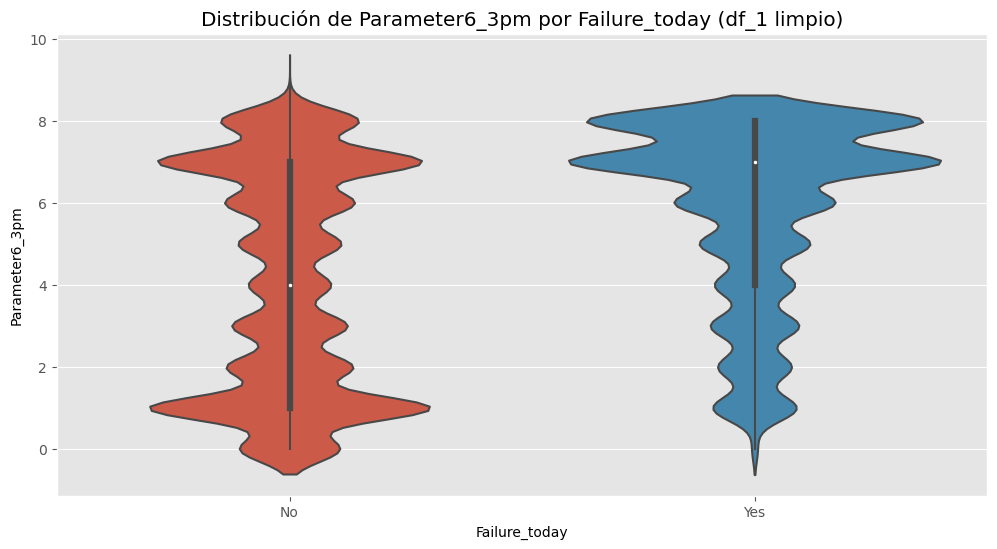

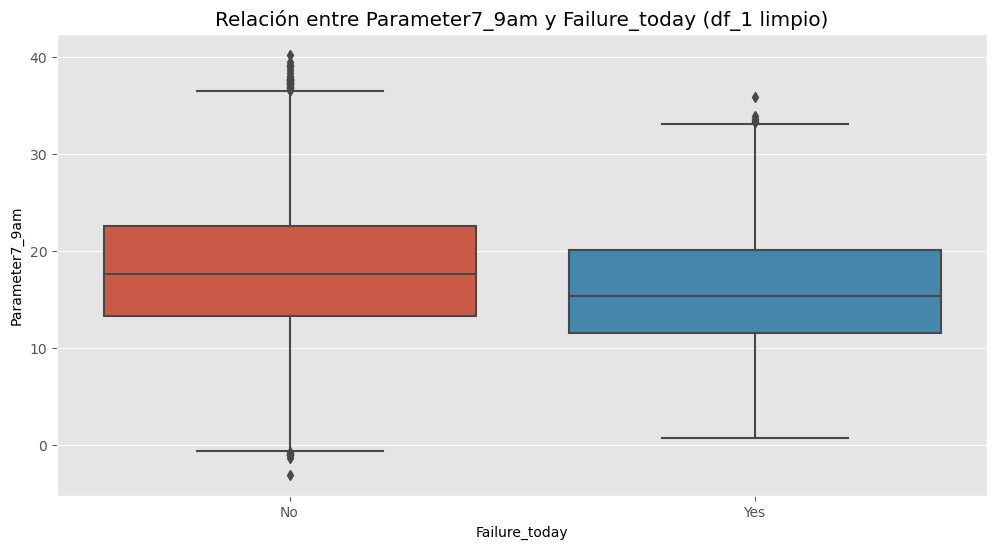

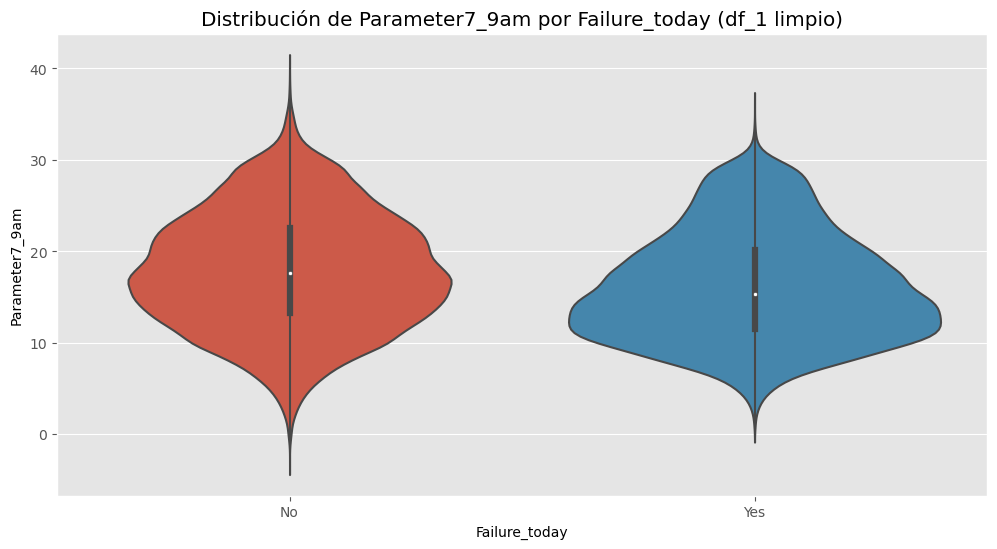

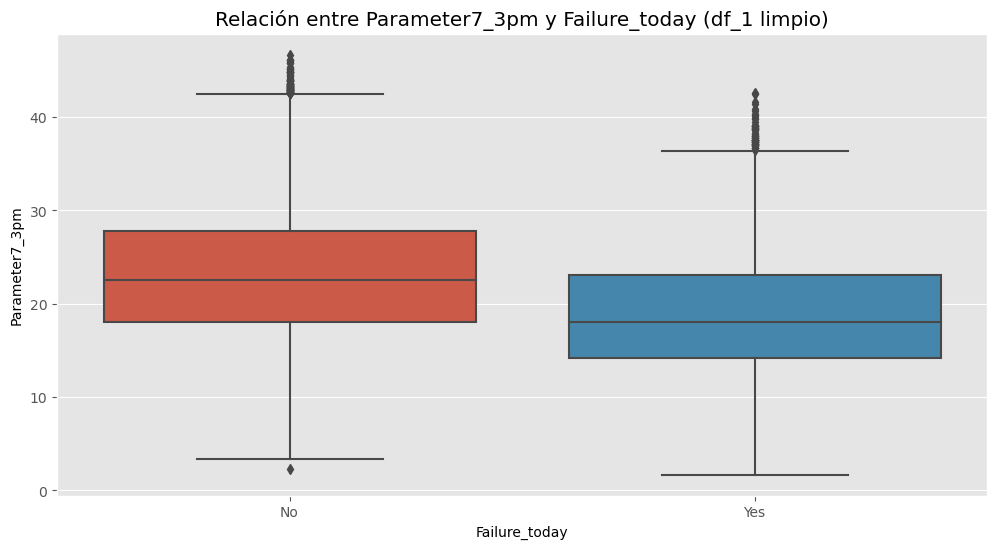

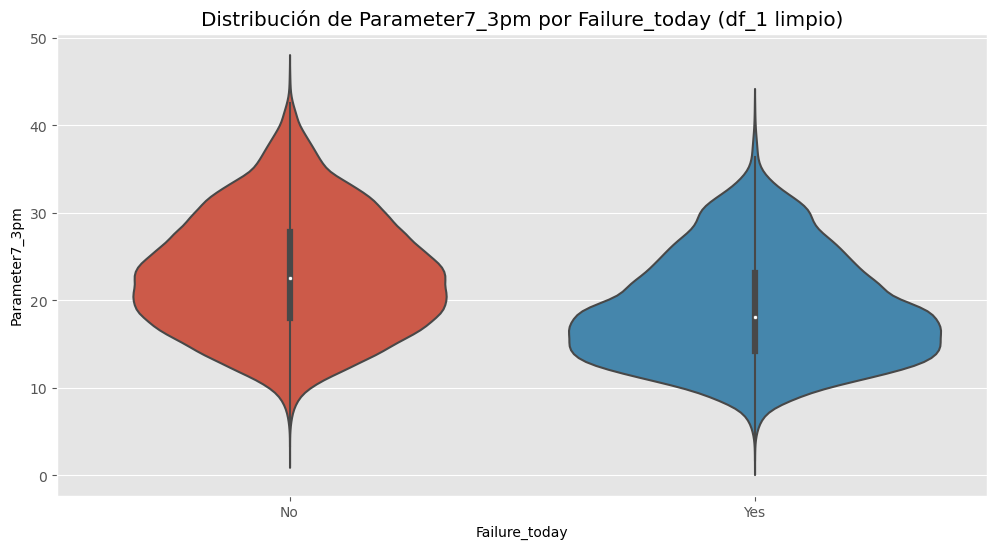

In [11]:
# Gráficos de relación para variables numéricas vs Failure_today
for col in numeric_cols:
    plt.figure(figsize=figsize)
    
    # Boxplot comparativo
    sns.boxplot(x='Failure_today', y=col, data=df_1)
    plt.title(f'Relación entre {col} y Failure_today (df_1 limpio)')
    plt.show()
    
    # Violin plot para ver mejor la distribución
    plt.figure(figsize=figsize)
    sns.violinplot(x='Failure_today', y=col, data=df_1)
    plt.title(f'Distribución de {col} por Failure_today (df_1 limpio)')
    plt.show()

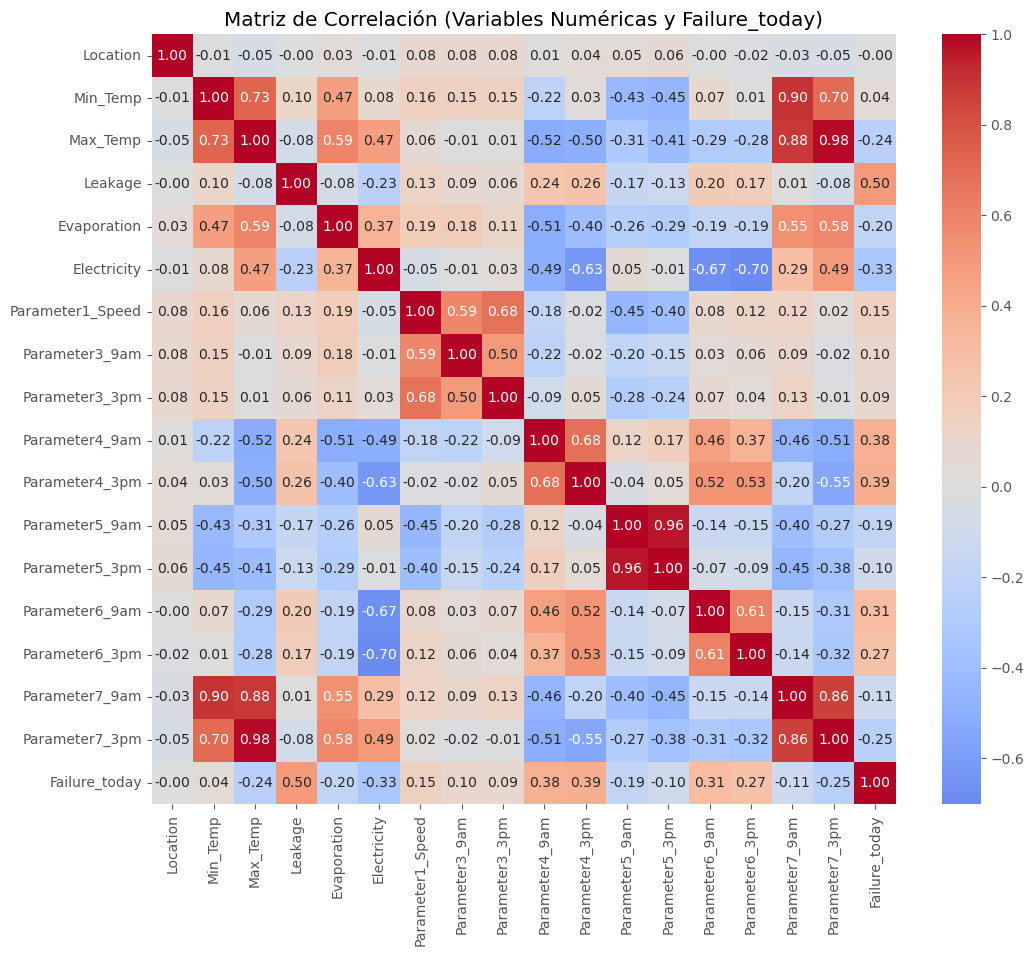

Correlación con Failure_today:
Failure_today       1.000000
Leakage             0.497554
Parameter4_3pm      0.386619
Parameter4_9am      0.378306
Parameter6_9am      0.307084
Parameter6_3pm      0.273361
Parameter1_Speed    0.154943
Parameter3_9am      0.099773
Parameter3_3pm      0.087702
Min_Temp            0.044605
Location           -0.000760
Parameter5_3pm     -0.104902
Parameter7_9am     -0.113986
Parameter5_9am     -0.188677
Evaporation        -0.197144
Max_Temp           -0.242983
Parameter7_3pm     -0.248650
Electricity        -0.332737
Name: Failure_today, dtype: float64


In [12]:
df_1['Failure_today'] = df_1['Failure_today'].map({'Yes': 1, 'No': 0})
# Crear una copia del dataframe para no modificar el original
df_corr = df_1.copy()

# Convertir Failure_today a numérico (0 y 1)
df_corr['Failure_today'] = df_corr['Failure_today'].astype(int)

# Calcular matriz de correlación
corr_matrix = df_corr[numeric_cols + ['Failure_today']].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlación (Variables Numéricas y Failure_today)')
plt.show()

# Mostrar solo las correlaciones con Failure_today
failure_corr = corr_matrix['Failure_today'].sort_values(ascending=False)
print("Correlación con Failure_today:")
print(failure_corr)

## **Selección de Variables Numéricas**  

### **Análisis Basado en la Matriz de Correlación**  

1. **Variables de Temperatura**  
   - Los 7 parámetros relacionados con temperatura (máxima y mínima) están altamente correlacionados.  
   - Para evitar **multicolinealidad**, se selecciona únicamente **`Min_temp`** (correlación positiva con **`failure_today`**).  
   - Se descartan **`Max_temp`** y variables similares. 

2. **Parámetro 6**  
   - Relevante pero con **excesivos valores nulos** (no usable en preguntas 2-4).  
   - Reservado para análisis posteriores (preguntas 6-8).  

3. **Variables Categóricas**  
   - **`Location`** es categórica (no numérica) con demasiadas categorías.  
   - Excluida por complejidad al generar _dummies_.  

4. **Otras Variables con Missing Values**  
   - **`Electricity`** y **`Evaporation`** tienen muchos **NaN** (no se incluyen en esta etapa).  

### **Variables Finales Seleccionadas**  

| Variable        | Razón de Selección                          |
|-----------------|---------------------------------------------|
| `Parametro_1`   | Baja correlación con otras variables        |
| `Parametro_3`   | Contribución significativa al modelo        |
| `Parametro_5`   | Relación relevante con la variable objetivo |
| `Max_temp`      | Mayor correlación con **`failure_today`**   |

> **Nota**: - Esta selección optimiza el balance entre información predictiva y evitación de redundancias.
            -igualmente en el codigo se dejaran comentarios para mejor compresion.

In [13]:
# 1. Crear las columnas dummie
df_1['Evaporation_is_nan'] = df_1['Evaporation'].isna().astype(int)
df_1['Electricity_is_nan'] = df_1['Electricity'].isna().astype(int)


# Creación de variables dummy para las variables categóricas

Comenzamos a generar variables dummy para las columnas categóricas del dataset, con el fin de prepararlas para el análisis. La selección final de qué variables se usarán específicamente para responder las preguntas 2, 3 y 4 se determinará más adelante, según su relevancia y comportamiento en los modelos.

Este paso nos permite trabajar con datos estructurados y listos para su implementación en los diferentes enfoques de análisis.

In [14]:
import pandas as pd

# Convertir la columna 'Date' a tipo datetime
df_1['Date'] = pd.to_datetime(df_1['Date'], errors='coerce')

# Verificar que no haya NaT (errores en conversión)
if df_1['Date'].isnull().any():
    print("Hay valores que no se pudieron convertir a fecha.")
    print(df_1[df_1['Date'].isnull()])

# Extraer fecha
df_1['Month'] = df_1['Date'].dt.month
df_1['DayOfWeek'] = df_1['Date'].dt.dayofweek  # 0=Lunes, 6=Domingo
df_1['Quarter'] = df_1['Date'].dt.quarter

# Crear dummies excluyendo ciertas categorías
month_dummies = pd.get_dummies(df_1['Month'], prefix='Month').drop(columns=['Month_1'])  # Excluir enero
day_dummies = pd.get_dummies(df_1['DayOfWeek'], prefix='Day').drop(columns=['Day_6'])  # Excluir domingo
quarter_dummies = pd.get_dummies(df_1['Quarter'], prefix='Q').drop(columns=['Q_1'])  # Excluir Q1

# Concatenar dummies al DataFrame original
df_1 = pd.concat([df_1, month_dummies, day_dummies, quarter_dummies], axis=1)

# Resetear el índice
df_1.reset_index(drop=True, inplace=True)

# Mostrar resultado
df_1



Date  Location  Min_Temp  Max_Temp  Leakage  Evaporation  \
0      2008-12-01         3      13.4      22.9      0.6          NaN   
1      2008-12-02         3       7.4      25.1      0.0          NaN   
2      2008-12-03         3      12.9      25.7      0.0          NaN   
3      2008-12-04         3       9.2      28.0      0.0          NaN   
4      2008-12-05         3      17.5      32.3      1.0          NaN   
...           ...       ...       ...       ...      ...          ...   
112920 2017-06-20        42       3.5      21.8      0.0          NaN   
112921 2017-06-21        42       2.8      23.4      0.0          NaN   
112922 2017-06-22        42       3.6      25.3      0.0          NaN   
112923 2017-06-23        42       5.4      26.9      0.0          NaN   
112924 2017-06-24        42       7.8      27.0      0.0          NaN   

        Electricity Parameter1_Dir  Parameter1_Speed Parameter2_9am  ...  \
0               NaN              W              44.0              W  ...   
1               NaN            WNW              44.0            NNW  ...   
2               NaN            WSW              46.0              W  ...   
3               NaN             NE              24.0             SE  ...   
4               NaN              W              41.0            ENE  ...   
...             ...            ...               ...            ...  ...   
112920          NaN              E              31.0            ESE  ...   
112921          NaN              E              31.0             SE  ...   
112922          NaN            NNW              22.0             SE  ...   
112923          NaN              N              37.0             SE  ...   
112924          NaN             SE              28.0            SSE  ...   

       Month_12  Day_0  Day_1  Day_2  Day_3  Day_4  Day_5  Q_2  Q_3  Q_4  
0             1      1      0      0      0      0      0    0    0    1  
1             1      0      1      0      0      0      0    0    0    1  
2             1      0      0      1      0      0      0    0    0    1  
3             1      0      0      0      1      0      0    0    0    1  
4             1      0      0      0      0      1      0    0    0    1  
...         ...    ...    ...    ...    ...    ...    ...  ...  ...  ...  
112920        0      0      1      0      0      0      0    1    0    0  
112921        0      0      0      1      0      0      0    1    0    0  
112922        0      0      0      0      1      0      0    1    0    0  
112923        0      0      0      0      0      1      0    1    0    0  
112924        0      0      0      0      0      0      1    1    0    0  

[112925 rows x 47 columns]

In [15]:
# Columnas de dirección a revisar
columnas_direccion = [
    'Parameter1_Dir',
    'Parameter2_9am',
    'Parameter2_3pm'
]

# Mostrar frecuencia de cada valor en cada columna
for col in columnas_direccion:
    print(f"Frecuencias en {col}:")
    print(df[col].value_counts(dropna=False).sort_index())  # Incluye NaN y orden alfabético
    print("---------------------------")


Frecuencias en Parameter1_Dir:
E      9071
ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN    9330
Name: Parameter1_Dir, dtype: int64
---------------------------
Frecuencias en Parameter2_9am:
E       9024
ENE     7735
ESE     7558
N      11393
NE      7527
NNE     7948
NNW     7840
NW      8552
S       8493
SE      9162
SSE     8966
SSW     7448
SW      8237
W       8260
WNW     7194
WSW     6843
NaN    10013
Name: Parameter2_9am, dtype: int64
---------------------------
Frecuencias en Parameter2_3pm:
E       8342
ENE     7724
ESE     8382
N       8667
NE      8164
NNE     6444
NNW     7733
NW      8468
S       9598
SE     10663
SSE     9142
SSW     8010
SW      9182
W       9911
WNW     8656
WSW     9329
NaN     3778
Name: Parameter2_3pm, dtype: int64
---------------------------


# Manejo de variables categóricas direccionales (ej. NNE, ESE, SSW):

Para las variables relacionadas con direcciones (como viento o ubicación), generar variables dummy resultaba inviable debido a la alta cardinalidad (muchas categorías distintas como "NNE", "ESE", "SW", etc.), lo que habría generado una matriz de datos excesivamente grande y difícil de manejar.

Solución implementada:

Agrupación por dirección principal:

Simplificamos las direcciones intermedias (ej. "NNE", "ENE") a sus puntos cardinales base (Norte, Sur, Este, Oeste).

Por ejemplo:

"NNE" (Norte-Noreste) → Norte

"ESE" (Este-Sureste) → Este

"SSW" (Sur-Suroeste) → Sur

Diccionario de conversión:

Creamos un diccionario para estandarizar automáticamente estas categorías, asegurando consistencia.

Justificación:

Esta aproximación reduce la dimensionalidad sin perder información crítica.

Mantiene la interpretabilidad de los datos (ej. vientos dominantes).

Permite un análisis más eficiente sin comprometer la calidad.

Nota: Se evaluó la opción de usar codificación circular (seno/coseno) para direcciones, pero se priorizó la simplicidad dado el alcance de la tarea.
ademas aqui se hizo la categorizacion de la varibale de estudio que seria Failure_today

In [16]:
import pandas as pd

# Diccionario de agrupación por puntos cardinales
direction_groups = {
    'Norte': ['N', 'NNE', 'NNW', 'NE', 'NW'],
    'Sur': ['S', 'SSE', 'SSW', 'SE', 'SW'],
    'Este': ['E', 'ENE', 'ESE'],
    'Oeste': ['W', 'WNW', 'WSW']
}

# Función para agrupar direcciones
def agrupar_direccion(val):
    for grupo, valores in direction_groups.items():
        if val in valores:
            return grupo
    return val  # En caso de que aparezca algo inesperado

# Columnas de dirección a transformar
columnas_direccion = ['Parameter1_Dir', 'Parameter2_9am', 'Parameter2_3pm']

# Aplicar la agrupación a todas las columnas de dirección
for col in columnas_direccion:
    df_1[col] = df_1[col].map(agrupar_direccion)


# Crear dummies para las columnas agrupadas (y eliminar una por columna para evitar multicolinealidad)
dummies = pd.get_dummies(df_1[columnas_direccion], prefix=columnas_direccion, drop_first=True)

# Unir las dummies al dataframe original
df_1 = pd.concat([df_1.drop(columns=columnas_direccion), dummies], axis=1)

# Mostrar el DataFrame resultante
df_1


Date  Location  Min_Temp  Max_Temp  Leakage  Evaporation  \
0      2008-12-01         3      13.4      22.9      0.6          NaN   
1      2008-12-02         3       7.4      25.1      0.0          NaN   
2      2008-12-03         3      12.9      25.7      0.0          NaN   
3      2008-12-04         3       9.2      28.0      0.0          NaN   
4      2008-12-05         3      17.5      32.3      1.0          NaN   
...           ...       ...       ...       ...      ...          ...   
112920 2017-06-20        42       3.5      21.8      0.0          NaN   
112921 2017-06-21        42       2.8      23.4      0.0          NaN   
112922 2017-06-22        42       3.6      25.3      0.0          NaN   
112923 2017-06-23        42       5.4      26.9      0.0          NaN   
112924 2017-06-24        42       7.8      27.0      0.0          NaN   

        Electricity  Parameter1_Speed  Parameter3_9am  Parameter3_3pm  ...  \
0               NaN              44.0            20.0            24.0  ...   
1               NaN              44.0             4.0            22.0  ...   
2               NaN              46.0            19.0            26.0  ...   
3               NaN              24.0            11.0             9.0  ...   
4               NaN              41.0             7.0            20.0  ...   
...             ...               ...             ...             ...  ...   
112920          NaN              31.0            15.0            13.0  ...   
112921          NaN              31.0            13.0            11.0  ...   
112922          NaN              22.0            13.0             9.0  ...   
112923          NaN              37.0             9.0             9.0  ...   
112924          NaN              28.0            13.0             7.0  ...   

        Q_4  Parameter1_Dir_Norte  Parameter1_Dir_Oeste  Parameter1_Dir_Sur  \
0         1                     0                     1                   0   
1         1                     0                     1                   0   
2         1                     0                     1                   0   
3         1                     1                     0                   0   
4         1                     0                     1                   0   
...     ...                   ...                   ...                 ...   
112920    0                     0                     0                   0   
112921    0                     0                     0                   0   
112922    0                     1                     0                   0   
112923    0                     1                     0                   0   
112924    0                     0                     0                   1   

        Parameter2_9am_Norte  Parameter2_9am_Oeste  Parameter2_9am_Sur  \
0                          0                     1                   0   
1                          1                     0                   0   
2                          0                     1                   0   
3                          0                     0                   1   
4                          0                     0                   0   
...                      ...                   ...                 ...   
112920                     0                     0                   0   
112921                     0                     0                   1   
112922                     0                     0                   1   
112923                     0                     0                   1   
112924                     0                     0                   1   

        Parameter2_3pm_Norte  Parameter2_3pm_Oeste  Parameter2_3pm_Sur  
0                          0                     1                   0  
1                          0                     1                   0  
2                          0                     1                   0  
3                          0                     0                   

# Selección de variables categóricas significativas para el modelo binario

Para optimizar la inclusión de variables dummy en el modelo sin depender únicamente de un proceso iterativo manual, exploramos herramientas estadísticas que permiten evaluar su relevancia de manera más eficiente:

Métodos utilizados:
Prueba de Chi-cuadrado (χ²)

Evaluamos la independencia entre cada variable categórica y la variable objetivo binaria.

Variables con un p-valor < 0.05 se consideraron significativas.

Odds Ratio (OR)(visto en clases)

Calculamos la razón de momios para identificar categorías con mayor asociación con el evento de interés.

Variables con un OR significativamente distinto de 1 (y con intervalos de confianza estrechos) se priorizaron.

Resultados y ajustes:
Aunque estos métodos redujeron el número de variables candidatas, 3-4 variables no significativas (según los criterios) se incluyeron inicialmente debido a:

Su relevancia teórica en el contexto del problema.

Posibles interacciones no capturadas por las pruebas univariadas.

In [17]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Identificar todas las columnas dummy creadas
dummy_columns = []
dummy_columns.extend([col for col in df_1.columns if col.startswith('Month_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Day_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Q_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Parameter1_Dir_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Parameter2_9am_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Parameter2_3pm_')])

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Variable', 'Chi2 p-value', 'Odds Ratio'])

# Aplicar los tests a cada dummy
for dummy in dummy_columns:
    # Test Chi-cuadrado
    tabla = pd.crosstab(df_1[dummy], df_1['Failure_today'])
    chi2, p_valor, _, _ = chi2_contingency(tabla)
    
    # Odds Ratio (solo si hay suficientes datos)
    try:
        modelo_logit = sm.Logit(df_1['Failure_today'], sm.add_constant(df_1[[dummy]])).fit(disp=0)
        odds_ratio = np.exp(modelo_logit.params[dummy])
    except:
        odds_ratio = np.nan
    
    # Almacenar resultados
    results.loc[len(results)] = [dummy, p_valor, odds_ratio]

# Ordenar por significancia estadística (p-value)
results = results.sort_values(by='Chi2 p-value')

# Mostrar resultados
print("Resultados de los tests para todas las variables dummy:")
pd.set_option('display.max_rows', None)
display(results)
pd.reset_option('display.max_rows')


Resultados de los tests para todas las variables dummy:


Variable   Chi2 p-value  Odds Ratio
24  Parameter2_9am_Oeste   0.000000e+00    1.956964
21  Parameter1_Dir_Oeste  1.087271e-209    1.666845
26  Parameter2_3pm_Norte  3.732449e-179    0.615252
27  Parameter2_3pm_Oeste  8.071763e-162    1.571575
20  Parameter1_Dir_Norte  2.989143e-138    0.653426
28    Parameter2_3pm_Sur   2.435070e-98    1.362444
22    Parameter1_Dir_Sur   2.330060e-82    1.327251
25    Parameter2_9am_Sur   6.809336e-81    1.327365
23  Parameter2_9am_Norte   9.231717e-59    0.775897
18                   Q_3   2.609538e-44    1.253384
5                Month_7   2.828689e-38    1.376350
4                Month_6   4.619783e-26    1.296866
19                   Q_4   3.513964e-23    0.845700
6                Month_8   2.091357e-18    1.243861
8               Month_10   6.716885e-13    0.825566
17                   Q_2   1.125977e-11    1.116952
0                Month_2   1.108608e-07    0.861802
9               Month_11   1.169636e-05    0.890614
10              Month_12   9.705972e-05    0.899484
11                 Day_0   1.900688e-01    1.026925
3                Month_5   2.314419e-01    1.030927
2                Month_4   2.708752e-01    0.970871
1                Month_3   3.529954e-01    0.976790
12                 Day_1   4.677568e-01    1.014984
14                 Day_3   5.380242e-01    1.012811
13                 Day_2   6.564999e-01    0.990798
15                 Day_4   7.093167e-01    1.007871
7                Month_9   7.350432e-01    1.009178
16                 Day_5   7.753310e-01    0.993931

In [18]:
# Clasificar las variables dummy
results['Incluir en modelo'] = results['Chi2 p-value'] < 0.05
results['Interpretación OR'] = np.where(
    results['Odds Ratio'] > 1, 
    'Mayor riesgo de fallo',
    np.where(
        results['Odds Ratio'] < 1,
        'Menor riesgo de fallo',
        'Sin cambio en el riesgo'
    )
)

# Crear tabla resumen
tabla_resumen = results[['Variable', 'Chi2 p-value', 'Odds Ratio', 'Incluir en modelo', 'Interpretación OR']].copy()

# Redondear p-value y Odds Ratio, manejando NaN
tabla_resumen['Chi2 p-value'] = tabla_resumen['Chi2 p-value'].round(4)
tabla_resumen['Odds Ratio'] = tabla_resumen['Odds Ratio'].apply(lambda x: np.nan if np.isnan(x) else round(x, 2))

# Separar en dos tablas: significativas y no significativas
tabla_significativas = tabla_resumen[tabla_resumen['Incluir en modelo']].sort_values('Chi2 p-value')
tabla_no_significativas = tabla_resumen[~tabla_resumen['Incluir en modelo']].sort_values('Chi2 p-value')

# Mostrar resultados
print("="*80)
print("VARIABLES DUMMY QUE DEBEN INCLUIRSE EN EL MODELO (p < 0.05)")
print("="*80)
display(tabla_significativas)

print("\n" + "="*80)
print("VARIABLES DUMMY QUE NO DEBEN INCLUIRSE EN EL MODELO (p ≥ 0.05)")
print("="*80)
display(tabla_no_significativas)



VARIABLES DUMMY QUE DEBEN INCLUIRSE EN EL MODELO (p < 0.05)


Variable  Chi2 p-value  Odds Ratio  Incluir en modelo  \
24  Parameter2_9am_Oeste        0.0000        1.96               True   
0                Month_2        0.0000        0.86               True   
17                   Q_2        0.0000        1.12               True   
8               Month_10        0.0000        0.83               True   
6                Month_8        0.0000        1.24               True   
19                   Q_4        0.0000        0.85               True   
4                Month_6        0.0000        1.30               True   
5                Month_7        0.0000        1.38               True   
9               Month_11        0.0000        0.89               True   
18                   Q_3        0.0000        1.25               True   
25    Parameter2_9am_Sur        0.0000        1.33               True   
22    Parameter1_Dir_Sur        0.0000        1.33               True   
28    Parameter2_3pm_Sur        0.0000        1.36               True   
20  Parameter1_Dir_Norte        0.0000        0.65               True   
27  Parameter2_3pm_Oeste        0.0000        1.57               True   
26  Parameter2_3pm_Norte        0.0000        0.62               True   
21  Parameter1_Dir_Oeste        0.0000        1.67               True   
23  Parameter2_9am_Norte        0.0000        0.78               True   
10              Month_12        0.0001        0.90               True   

        Interpretación OR  
24  Mayor riesgo de fallo  
0   Menor riesgo de fallo  
17  Mayor riesgo de fallo  
8   Menor riesgo de fallo  
6   Mayor riesgo de fallo  
19  Menor riesgo de fallo  
4   Mayor riesgo de fallo  
5   Mayor riesgo de fallo  
9   Menor riesgo de fallo  
18  Mayor riesgo de fallo  
25  Mayor riesgo de fallo  
22  Mayor riesgo de fallo  
28  Mayor riesgo de fallo  
20  Menor riesgo de fallo  
27  Mayor riesgo de fallo  
26  Menor riesgo de fallo  
21  Mayor riesgo de fallo  
23  Menor riesgo de fallo  
10  Menor riesgo de fallo


VARIABLES DUMMY QUE NO DEBEN INCLUIRSE EN EL MODELO (p ≥ 0.05)


Variable  Chi2 p-value  Odds Ratio  Incluir en modelo  \
11    Day_0        0.1901        1.03              False   
3   Month_5        0.2314        1.03              False   
2   Month_4        0.2709        0.97              False   
1   Month_3        0.3530        0.98              False   
12    Day_1        0.4678        1.01              False   
14    Day_3        0.5380        1.01              False   
13    Day_2        0.6565        0.99              False   
15    Day_4        0.7093        1.01              False   
7   Month_9        0.7350        1.01              False   
16    Day_5        0.7753        0.99              False   

        Interpretación OR  
11  Mayor riesgo de fallo  
3   Mayor riesgo de fallo  
2   Menor riesgo de fallo  
1   Menor riesgo de fallo  
12  Mayor riesgo de fallo  
14  Mayor riesgo de fallo  
13  Menor riesgo de fallo  
15  Mayor riesgo de fallo  
7   Mayor riesgo de fallo  
16  Menor riesgo de fallo

In [19]:
print(df_1.columns)


Index(['Date', 'Location', 'Min_Temp', 'Max_Temp', 'Leakage', 'Evaporation',
       'Electricity', 'Parameter1_Speed', 'Parameter3_9am', 'Parameter3_3pm',
       'Parameter4_9am', 'Parameter4_3pm', 'Parameter5_9am', 'Parameter5_3pm',
       'Parameter6_9am', 'Parameter6_3pm', 'Parameter7_9am', 'Parameter7_3pm',
       'Failure_today', 'Evaporation_is_nan', 'Electricity_is_nan', 'Month',
       'DayOfWeek', 'Quarter', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12', 'Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Q_2',
       'Q_3', 'Q_4', 'Parameter1_Dir_Norte', 'Parameter1_Dir_Oeste',
       'Parameter1_Dir_Sur', 'Parameter2_9am_Norte', 'Parameter2_9am_Oeste',
       'Parameter2_9am_Sur', 'Parameter2_3pm_Norte', 'Parameter2_3pm_Oeste',
       'Parameter2_3pm_Sur'],
      dtype='object')


In [20]:
print(df_1['Evaporation_is_nan'].value_counts())
print(df_1['Electricity_is_nan'].value_counts())

0    71781
1    41144
Name: Evaporation_is_nan, dtype: int64
0    66646
1    46279
Name: Electricity_is_nan, dtype: int64


In [21]:
# Comprobar si hay NaNs en las variables
print(df_1.isna().sum())  # Mostrar la cantidad de NaNs por columna

Date                        0
Location                    0
Min_Temp                    0
Max_Temp                    0
Leakage                     0
Evaporation             41144
Electricity             46279
Parameter1_Speed            0
Parameter3_9am              0
Parameter3_3pm              0
Parameter4_9am              0
Parameter4_3pm              0
Parameter5_9am              0
Parameter5_3pm              0
Parameter6_9am          37310
Parameter6_3pm          38646
Parameter7_9am              0
Parameter7_3pm              0
Failure_today               0
Evaporation_is_nan          0
Electricity_is_nan          0
Month                       0
DayOfWeek                   0
Quarter                     0
Month_2                     0
Month_3                     0
Month_4                     0
Month_5                     0
Month_6                     0
Month_7                     0
Month_8                     0
Month_9                     0
Month_10                    0
Month_11  


2. # Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 




In [22]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Definir las variables a excluir
variables_a_excluir = [
    "Location",
    "Parameter7_3pm",  # Redundante con Min_Temp
    "Parameter7_9am",  # Redundante con Min_Temp
    "Parameter5_3pm",  # Redundante con Parameter5_9am
    "Max_Temp",        # Redundante con Min_Temp
    "Electricity",     # Redundante con Electricity_is_nan
    "Evaporation",     #redudante con Evaporation_is_nan
    "DayOfWeek",
    "Quarter",
    "Month",
    "Leakage",   #explica toda la data
    "Parameter6_3pm",#muchos valores nulos no manejables
    "Parameter6_9am",#muchos valores nulos no manejables
]

# Definir la variable dependiente (y) y las independientes (X)
y = df_1['Failure_today']
X = df_1.drop(columns=variables_a_excluir + ['Failure_today'], axis=1)

# Seleccionar solo columnas numéricas y las dummies significativas
# Primero identificamos las columnas numéricas
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns

# Definir las dummies significativas que quieres incluir
dummies_significativas = [
    # Meses
    'Month_6', 'Month_7', 'Month_10', 'Month_11', 'Month_2',
    
    # Parámetros de dirección del viento a las 9am (Parameter2_9am)
    'Parameter2_9am_Oeste', 'Parameter2_9am_Sur', 'Parameter2_9am_Norte',
    
    # Parámetros de dirección del viento a las 3pm (Parameter2_3pm)
    'Parameter2_3pm_Sur', 'Parameter2_3pm_Oeste', 'Parameter2_3pm_Norte',
    
    # Parámetros de dirección (Parameter1_Dir)
    'Parameter1_Dir_Norte', 'Parameter1_Dir_Oeste', 'Parameter1_Dir_Sur',
    
    # Variables de preguntas (Q)
    'Q_2', 'Q_3', 'Q_4',

    # Indicadores de valores faltantes
    'Electricity_is_nan',
    'Evaporation_is_nan',
]

# Filtrar las columnas: numéricas + dummies significativas
columnas_a_incluir = list(numeric_cols) + [col for col in dummies_significativas if col in X.columns]
X = X[columnas_a_incluir]

# Estandarizar las variables continuas (numéricas)
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Agregar una constante para el modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit(cov_type='HC0')  # Usar errores estándar robustos

# Mostrar el resumen de los resultados
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:          Failure_today   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     1609.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:14:26   Log-Likelihood:                -44282.
No. Observations:              112925   AIC:                         8.862e+04
Df Residuals:                  112898   BIC:                         8.888e+04
Df Model:                          26                                         
Covariance Type:                  HC0                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1458 

R:
# Interpretación del Modelo de Regresión OLS: Coeficientes Marginales

## Visión General del Modelo  
- **Variable Dependiente**: `Failure_today`  
- **R²**: 0.264 (26.4% de la variabilidad explicada)  
- **Método**: Mínimos Cuadrados Ordinarios (OLS) con errores robustos (HC0)  
- **Nº Observaciones**: 112,925  

---

## Análisis de Coeficientes Significativos  

### 1. **Variables Climáticas**  
| Variable           | Coef. | Interpretación |  
|--------------------|-------|----------------|  
| `Min_Temp`         | 0.0312 | ↑1°C en temp. mínima → ↑3.12% probabilidad de falla |  
| `Parameter1_Speed` | 0.0649 | ↑1 unidad en velocidad → ↑6.49% probabilidad de falla |  
| `Parameter3_9am`   | 0.0347 | ↑1 unidad a las 9am → ↑3.47% probabilidad |  
| `Parameter3_3pm`   | -0.0408 | ↑1 unidad a las 3pm → ↓4.08% probabilidad |  
| `Parameter4_9am`   | 0.1422 | ↑1 unidad a las 9am → ↑**14.22%** (efecto mayor) |  

### 2. **Efectos Estacionales**  
| Variable  | Coef.  | Interpretación |  
|-----------|--------|----------------|  
| `Month_10` | 0.0495 | Octubre → ↑4.95% vs meses base |  
| `Q_3`      | 0.1019 | 3er trimestre → ↑**10.19%** probabilidad |  

### 3. **Dirección del Viento**  
| Variable               | Coef.  | Interpretación |  
|------------------------|--------|----------------|  
| `Parameter1_Dir_Norte` | -0.0246 | Viento norte → ↓2.46% probabilidad |  
| `Parameter1_Dir_Oeste` | 0.0098  | Viento oeste → ↑0.98% probabilidad |  

### 4. **Calidad de Datos**  
| Variable             | Coef.  | Interpretación |  
|----------------------|--------|----------------|  
| `Electricity_is_nan` | -0.0124 | Datos faltantes → ↓1.24% probabilidad |  

---

## Conclusiones Clave  
1. **Mayores impactos positivos**:  
   - `Parameter4_9am` (+14.22%)  
   - `Q_3` (+10.19%)  
   - `Parameter1_Speed` (+6.49%)  

2. **Efectos horarios**: Variables como `Parameter3` y `Parameter4` muestran comportamientos opuestos en 9am vs 3pm.  

3. **Robustez**: Todos los coeficientes mencionados son significativos (p-value < 0.05), excepto `Evaporation_is_nan` (p=0.813), `Parameter1_Dir_Sur` (p=0.072) y `Month_6` (p=0.726)


# 3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 



In [23]:
model = sm.Probit(y, X)
probit_model = model.fit(cov_type='HC0')  
print(probit_model.summary())

mfxp = probit_model.get_margeff()
print(mfxp.summary())

Optimization terminated successfully.
         Current function value: 0.379163
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               112925
Model:                         Probit   Df Residuals:                   112898
Method:                           MLE   Df Model:                           26
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.2883
Time:                        23:14:26   Log-Likelihood:                -42817.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.4302      0.021    -69.528      0.000      -1.470      -1.390

R:
# Interpretación del Modelo Probit: Efectos Marginales

## Visión General del Modelo
- **Tipo de modelo**: Probit (regresión para variables binarias)
- **Variable dependiente**: `Failure_today` (probabilidad de falla)
- **Método de estimación**: Máxima Verosimilitud (MLE)
- **Pseudo R-cuadrado**: 0.2883
- **Convergencia**: Exitosa en 7 iteraciones
- **Observaciones**: 112,925

## Interpretación de Efectos Marginales

### Variables Climáticas Principales
| Variable           | Efecto Marginal | Interpretación |
|--------------------|-----------------|----------------|
| `Parameter4_9am`   | 0.1522          | Aumento de 1 unidad incrementa la probabilidad de falla en 15.22 puntos porcentuales |
| `Parameter1_Speed` | 0.0508          | Aumento de 1 unidad en velocidad incrementa probabilidad en 5.08 puntos |
| `Min_Temp`         | 0.0305          | Cada grado adicional de temperatura mínima aumenta riesgo en 3.05 puntos |
| `Parameter3_3pm`   | -0.0270         | Aumento de 1 unidad a las 3pm disminuye probabilidad en 2.70 puntos |

### Efectos Estacionales
| Variable | Efecto Marginal | Interpretación |
|----------|-----------------|----------------|
| `Q_3`    | 0.0863          | El tercer trimestre aumenta probabilidad en 8.63 puntos vs referencia |
| `Month_10` | 0.0328       | Octubre presenta mayor riesgo (3.28 puntos más) |
| `Month_7` | -0.0150        | Julio muestra efecto reductor (-1.50 puntos) |

### Variables Direccionales
| Variable               | Efecto Marginal | Interpretación |
|------------------------|-----------------|----------------|
| `Parameter2_9am_Oeste` | 0.0708          | Condiciones Oeste a las 9am aumentan riesgo en 7.08 puntos |
| `Parameter1_Dir_Norte` | -0.0246         | Vientos del Norte reducen probabilidad en 2.46 puntos |

### Calidad de Datos
| Variable             | Efecto Marginal | Interpretación |
|----------------------|-----------------|----------------|
| `Electricity_is_nan` | -0.0171         | Datos faltantes de electricidad reducen probabilidad en 1.71 puntos |

## Variables No Significativas
- `Month_6` (p=0.564)
- `Evaporation_is_nan` (p=0.993)
- `Parameter2_9am_Norte` (p=0.163)

## Conclusiones Clave
1. **Factores de mayor impacto**:
   - `Parameter4_9am` (15.22%)
   - `Q_3` (8.63%)
   - `Parameter1_Speed` (5.08%)

2. **Patrón temporal**:
   - Efectos más pronunciados en mediciones matutinas (9am vs 3pm)
   - Variabilidad estacional importante (especialmente tercer trimestre y octubre)

3. **Recomendación operativa**:
   - Enfocar monitoreo en condiciones matutinas
   - Refuerzo preventivo durante tercer trimestre
   - Atención especial a mediciones de `Parameter4` y velocidad



# 4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 



In [24]:
model = sm.Logit(y, X)
logit_model = model.fit(cov_type='HC0')
print(logit_model.summary())

mfxl = logit_model.get_margeff()
print(mfxl.summary())

params = logit_model.params
conf = logit_model.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['Odds Ratio', '5%', '95%']
print("Odds Ratios")
print(np.exp(conf).iloc[1:26 , ])

Optimization terminated successfully.
         Current function value: 0.378809
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          Failure_today   No. Observations:               112925
Model:                          Logit   Df Residuals:                   112898
Method:                           MLE   Df Model:                           26
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.2889
Time:                        23:14:29   Log-Likelihood:                -42777.
converged:                       True   LL-Null:                       -60159.
Covariance Type:                  HC0   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.5198      0.037    -68.331      0.000      -2.592      -2.447

R:
# Interpretación del Modelo Logit: Efectos Marginales y Odds Ratios

## Visión General del Modelo
- **Tipo de modelo**: Regresión Logit (para variable binaria `Failure_today`)
- **Pseudo R²**: 0.2889 (28.89% de varianza explicada)
- **Convergencia**: Exitosa en 7 iteraciones
- **Log-Likelihood**: -42,777 (vs -60,159 del modelo nulo)
- **Muestra**: 112,925 observaciones

## Efectos Marginales Principales (dy/dx)

### Variables Climáticas Críticas
| Variable           | Efecto Marginal | Interpretación |
|--------------------|-----------------|----------------|
| `Parameter4_9am`   | **0.1553**      | ↑1 unidad → ↑15.53% probabilidad de falla |
| `Parameter1_Speed` | 0.0495          | ↑1 unidad → ↑4.95% probabilidad |
| `Min_Temp`         | 0.0321          | ↑1°C → ↑3.21% probabilidad |
| `Parameter3_3pm`   | -0.0256         | ↑1 unidad → ↓2.56% probabilidad |

### Factores Estacionales
| Variable | Efecto Marginal | Interpretación |
|----------|-----------------|----------------|
| `Q_3`    | **0.0897**      | 3er trimestre → ↑8.97% vs referencia |
| `Month_10` | 0.0320       | Octubre → ↑3.20% probabilidad |
| `Month_7` | -0.0126        | Julio → ↓1.26% probabilidad |

### Variables Direccionales
| Variable               | Efecto Marginal | Interpretación |
|------------------------|-----------------|----------------|
| `Parameter2_9am_Oeste` | 0.0713          | Oeste a las 9am → ↑7.13% |
| `Parameter2_9am_Sur`   | 0.0654          | Sur a las 9am → ↑6.54% |
| `Parameter1_Dir_Norte` | -0.0255         | Viento Norte → ↓2.55% |

## Odds Ratios Destacados

### Variables con Mayor Impacto
| Variable           | Odds Ratio | Interpretación |
|--------------------|------------|----------------|
| `Parameter4_9am`   | **3.546**  | Aumento de 1 unidad multiplica odds de falla por 3.55 |
| `Q_3`              | 1.977      | 3er trimestre casi duplica odds vs referencia |
| `Parameter1_Speed` | 1.472      | Cada unidad adicional multiplica odds por 1.47 |

### Variables Reductoras
| Variable           | Odds Ratio | Interpretación |
|--------------------|------------|----------------|
| `Parameter5_9am`   | 0.645      | Reduce odds en ~35.5% por unidad |
| `Parameter2_3pm_Norte` | 0.769 | Disminuye odds en ~23.1% |

## Variables No Significativas
- `Month_6` (p=0.845)
- `Evaporation_is_nan` (p=0.869)
- `Parameter2_9am_Norte` (p=0.134)
- `Parameter1_Dir_Sur` (p=0.117)

## Análisis Comparativo de Efectos

### Patrón Temporal
- **Horario**: Efectos matutinos (`_9am`) más pronunciados que vespertinos
- **Estacionalidad**: 
  - Mayor riesgo en Q3 (verano)
  - Meses 10 y 11 con riesgo elevado
  - Julio (Month_7) con efecto protector

### Variables Geográficas/Direccionales
- **Oeste y Sur**: Consistentemente asociados con mayor riesgo
- **Norte**: Efecto reductor, especialmente en vientos (`Parameter1_Dir_Norte`)

## Recomendaciones Operativas
1. **Priorizar monitoreo** cuando:
   - `Parameter4_9am` muestra valores altos
   - Velocidad (`Parameter1_Speed`) aumenta
   - Durante el **tercer trimestre**

2. **Acciones preventivas** recomendadas:
   - Refuerzo en octubre
   - Atención especial a mediciones matutinas
   - Considerar umbrales de alerta para `Parameter4_9am` >1 unidad

3. **Variables para ignorar** en decisiones:
   - `Evaporation_is_nan` (datos faltantes no predictivos)
   - `Month_6` (junio sin efecto significativo)


# 5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R:
# Análisis Comparativo de Modelos y Selección del Más Adecuado

## 1. Comparación de Resultados entre Modelos

### Diferencias Clave Observadas:

| Aspecto               | OLS            | Probit         | Logit          |
|-----------------------|----------------|----------------|----------------|
| **Interpretación**    | Cambio lineal en probabilidad | Cambio en probabilidad (no lineal) | Cambio en log-odds |
| **Efectos Marginales**| Coeficientes directos | Transformación no lineal | Transformación no lineal |
| **Pseudo R²/R²**     | 0.264          | 0.2883         | 0.2889         |
| **Variables Significativas** | Similar patrón | Similar patrón | Similar patrón |

### Variables con Mayor Consistencia:
1. `Parameter4_9am`: Efecto positivo fuerte en los tres modelos (15.22% en Probit, 15.53% en Logit)
2. `Q_3` (Tercer trimestre): Impacto positivo significativo en todos los modelos
3. `Parameter1_Speed`: Efecto positivo robusto (~5% en efectos marginales)
4. `Parameter3_3pm`: Efecto negativo consistente

## 2. Diferencias entre Modelos y sus Causas

### Origen de las Diferencias:
1. **Naturaleza de la VD**:
   - OLS trata la probabilidad como variable continua
   - Probit/Logit modelan adecuadamente variables binarias

2. **Forma Funcional**:
   - OLS: Lineal
   - Probit: Distribución normal acumulada
   - Logit: Función logística

3. **Interpretación**:
   - OLS: Efectos aditivos directos
   - Probit/Logit: Efectos no lineales (marginales varían según valores de X)

4. **Ajuste**:
   - Probit/Logit muestran mejor ajuste (Pseudo R² más alto)

## 3. Modelo Más Adecuado

**Selección: Modelo Logit**  
Razones:
1. **Adecuación teórica**: Diseñado específicamente para variables dependientes binarias
2. **Mejor ajuste**: Pseudo R² ligeramente superior a Probit (0.2889 vs 0.2883)
3. **Interpretabilidad**: Odds ratios proveen métricas intuitivas para análisis de riesgo
4. **Robustez**: Resultados consistentes con Probit pero con mayor facilidad de interpretación

*Excepción*: Si se asume distribución normal subyacente, Probit sería preferible, pero la diferencia práctica es mínima.

## 4. Variables Robustas a Especificación

**Variables consistentemente significativas (p<0.01) en los tres modelos**:

1. **Climáticas**:
   - `Parameter4_9am` (efecto positivo fuerte)
   - `Parameter1_Speed` (positivo)
   - `Min_Temp` (positivo)
   - `Parameter3_3pm` (negativo)

2. **Temporales**:
   - `Q_3` (tercer trimestre, positivo)
   - `Month_10` (octubre, positivo)

3. **Direccionales**:
   - `Parameter2_9am_Oeste` (positivo)
   - `Parameter1_Dir_Norte` (negativo)

## 5. Conclusion:
Se puede concluir que los modelos logit y probit son mucho más adecuados para este caso, ya que estamos tratando de modelar una variable categórica a partir de una combinación de variables continuas y categóricas. En este tipo de situaciones, un modelo de Mínimos Cuadrados Ordinarios (MCO) no es el más apropiado. Entre los dos modelos robustos presentados, me quedaría con el modelo logit, ya que permite la interpretación mediante los odds ratios, lo cual es especialmente útil considerando que una parte importante del problema es comparar los coeficientes marginales.

# 6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

Para realizar el ejercicio 6, primero se trabajó la data y se creó un nuevo DataFrame llamado df_2, que en realidad corresponde a una versión restaurada del df_1 a su forma original. Esta separación en dos partes fue útil para mejorar la comprensión del proceso y evitar confusiones ante la cantidad de tareas necesarias para el manejo de los datos.

En resumen, en df_2 se calcularon promedios mensuales. Para ello, se agruparon los datos por locación y mes. Luego, se generó un indicador para las variables con muchos valores faltantes, considerando el momento en que se creó el DataFrame mensual, con el objetivo de incluir la mayor cantidad posible de variables continuas. Todo esto se hizo respetando los criterios definidos en las preguntas 2, 3 y 4, como por ejemplo, la exclusión de ciertos parámetros que distorsionaban el análisis, como el parámetro7 y las temperaturas.

Es importante señalar que, para responder la pregunta 8, se realizó una estandarización del DataFrame. Esto se debió a que el modelo de regresión binomial negativa no lograba converger, y la estandarización resultó ser una solución efectiva para este problema,ademas se elimino el parametro 6 dado que genera mucho ruido aumentando la sobredispercion

In [25]:
# Identificar todas las columnas dummy creadas
dummy_columns = []
dummy_columns.extend([col for col in df_1.columns if col.startswith('Month_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Day_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Q_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Parameter1_Dir_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Parameter2_9am_')])
dummy_columns.extend([col for col in df_1.columns if col.startswith('Parameter2_3pm_')])

# Otras columnas específicas a eliminar
columns_to_drop = ['Month', 'DayOfWeek', 'Quarter', 'Evaporation_is_nan', 'Electricity_is_nan', 'Leakage']

# Unir todas las columnas a eliminar
all_columns_to_drop = dummy_columns + columns_to_drop

# Crear df_2 eliminando esas columnas
df_2 = df_1.drop(columns=all_columns_to_drop)

df_2

Date  Location  Min_Temp  Max_Temp  Evaporation  Electricity  \
0      2008-12-01         3      13.4      22.9          NaN          NaN   
1      2008-12-02         3       7.4      25.1          NaN          NaN   
2      2008-12-03         3      12.9      25.7          NaN          NaN   
3      2008-12-04         3       9.2      28.0          NaN          NaN   
4      2008-12-05         3      17.5      32.3          NaN          NaN   
...           ...       ...       ...       ...          ...          ...   
112920 2017-06-20        42       3.5      21.8          NaN          NaN   
112921 2017-06-21        42       2.8      23.4          NaN          NaN   
112922 2017-06-22        42       3.6      25.3          NaN          NaN   
112923 2017-06-23        42       5.4      26.9          NaN          NaN   
112924 2017-06-24        42       7.8      27.0          NaN          NaN   

        Parameter1_Speed  Parameter3_9am  Parameter3_3pm  Parameter4_9am  \
0                   44.0            20.0            24.0            71.0   
1                   44.0             4.0            22.0            44.0   
2                   46.0            19.0            26.0            38.0   
3                   24.0            11.0             9.0            45.0   
4                   41.0             7.0            20.0            82.0   
...                  ...             ...             ...             ...   
112920              31.0            15.0            13.0            59.0   
112921              31.0            13.0            11.0            51.0   
112922              22.0            13.0             9.0            56.0   
112923              37.0             9.0             9.0            53.0   
112924              28.0            13.0             7.0            51.0   

        Parameter4_3pm  Parameter5_9am  Parameter5_3pm  Parameter6_9am  \
0                 22.0          1007.7          1007.1             8.0   
1                 25.0          1010.6          1007.8             NaN   
2                 30.0          1007.6          1008.7             NaN   
3                 16.0          1017.6          1012.8             NaN   
4                 33.0          1010.8          1006.0             7.0   
...                ...             ...             ...             ...   
112920            27.0          1024.7          1021.2             NaN   
112921            24.0          1024.6          1020.3             NaN   
112922            21.0          1023.5          1019.1             NaN   
112923            24.0          1021.0          1016.8             NaN   
112924            24.0          1019.4          1016.5             3.0   

        Parameter6_3pm  Parameter7_9am  Parameter7_3pm  Failure_today  
0                  NaN            16.9            21.8              0  
1                  NaN            17.2            24.3              0  
2                  2.0            21.0            23.2              0  
3                  NaN            18.1            26.5              0  
4                  8.0            17.8            29.7              0  
...                ...             ...             ...            ...  
112920             NaN             9.4            20.9              0  
112921             NaN            10.1            22.4              0  
112922             NaN            10.9            24.5              0  
112923             NaN            12.5            26.1              0  
112924             2.0            15.1            26.0              0  

[112925 rows x 18 columns]

In [26]:
# Comprobar si hay NaNs en las variables
print(df_2.isna().sum())  # Mostrar la cantidad de NaNs por columna

Date                    0
Location                0
Min_Temp                0
Max_Temp                0
Evaporation         41144
Electricity         46279
Parameter1_Speed        0
Parameter3_9am          0
Parameter3_3pm          0
Parameter4_9am          0
Parameter4_3pm          0
Parameter5_9am          0
Parameter5_3pm          0
Parameter6_9am      37310
Parameter6_3pm      38646
Parameter7_9am          0
Parameter7_3pm          0
Failure_today           0
dtype: int64


In [27]:
# Asegurarse de que la columna 'Date' sea datetime
df_2['Date'] = pd.to_datetime(df_2['Date'])

# Crear columna 'Mes'
df_2['Mes'] = df_2['Date'].dt.to_period('M')

# Agrupar por Mes y Locación
df_mensual = df_2.groupby(['Mes', 'Location']).agg(
    {**{col: 'mean' for col in df_2.columns if col not in ['Date', 'Failure_today', 'Mes', 'Location']},
     'Failure_today': 'sum'}
).reset_index()

# Ver resultado
df_mensual


Mes  Location   Min_Temp   Max_Temp  Evaporation  Electricity  \
0     2007-11        10  11.753333  25.053333     5.900000     7.880000   
1     2007-12        10  13.312903  25.119355     5.819355     8.287097   
2     2008-01        10  15.348387  29.125806     7.941935     9.119355   
3     2008-02        10  12.737037  24.311111     5.888889     8.225926   
4     2008-03        10  10.789286  25.614286     5.821429     8.996429   
...       ...       ...        ...        ...          ...          ...   
4132  2017-06        45   4.345000  14.870000     1.510000     4.865000   
4133  2017-06        46  10.100000  18.356000          NaN          NaN   
4134  2017-06        47   8.827778  18.661111          NaN          NaN   
4135  2017-06        48  11.794118  17.729412          NaN          NaN   
4136  2017-06        49   5.952174  18.747826     2.976190     0.000000   

      Parameter1_Speed  Parameter3_9am  Parameter3_3pm  Parameter4_9am  \
0            41.266667        9.166667       16.133333       69.333333   
1            40.580645       10.032258       17.451613       69.774194   
2            43.064516        9.709677       16.322581       65.870968   
3            40.296296        9.777778       14.888889       72.629630   
4            37.464286        8.071429       14.071429       70.892857   
...                ...             ...             ...             ...   
4132         24.800000        6.200000        9.500000       97.300000   
4133         34.120000       16.440000       16.440000       87.200000   
4134         37.666667       12.833333       18.222222       84.222222   
4135         38.058824       15.529412       19.588235       71.882353   
4136         28.000000       11.391304       13.391304       66.565217   

      Parameter4_3pm  Parameter5_9am  Parameter5_3pm  Parameter6_9am  \
0          42.166667     1018.550000     1015.450000        4.400000   
1          49.290323     1015.051613     1012.696774        5.000000   
2          39.451613     1014.096774     1011.290323        4.225806   
3          47.037037     1013.666667     1011.088889        4.629630   
4          36.321429     1020.382143     1017.560714        3.000000   
...              ...             ...             ...             ...   
4132       67.350000     1028.070000     1025.615000        5.000000   
4133       70.880000     1025.720000     1023.492000        6.250000   
4134       68.888889     1022.788889     1020.844444             NaN   
4135       68.294118     1026.335294     1024.282353        7.000000   
4136       36.608696     1029.586957     1026.939130        2.954545   

      Parameter6_3pm  Parameter7_9am  Parameter7_3pm  Failure_today  
0           4.866667       16.750000       23.720000              7  
1           4.903226       17.767742       23.200000             12  
2           4.000000       19.716129       27.348387              5  
3           4.666667       16.207407       22.922222              8  
4           3.607143       15.221429       24.178571              3  
...              ...             ...             ...            ...  
4132        5.450000        6.650000       13.735000              3  
4133        6.812500       13.168000       17.304000             13  
4134             NaN       13.455556       17.305556              6  
4135        6.000000       14.911765       16.747059              4  
4136        3.833333       10.556522       18.052174              0  

[4137 rows x 18 columns]

In [28]:
print(df_mensual.isna().sum())  # Mostrar la cantidad de NaNs por columna

Mes                    0
Location               0
Min_Temp               0
Max_Temp               0
Evaporation         1431
Electricity         1664
Parameter1_Speed       0
Parameter3_9am         0
Parameter3_3pm         0
Parameter4_9am         0
Parameter4_3pm         0
Parameter5_9am         0
Parameter5_3pm         0
Parameter6_9am      1025
Parameter6_3pm      1039
Parameter7_9am         0
Parameter7_3pm         0
Failure_today          0
dtype: int64


In [29]:
# Crear columnas indicadoras de NaN
for col in df_mensual.columns:
    if df_mensual[col].isna().any():
        df_mensual[f'{col}_is_nan'] = df_mensual[col].isna().astype(int)
        print(col)

df_mensual


Evaporation
Electricity
Parameter6_9am
Parameter6_3pm


Mes  Location   Min_Temp   Max_Temp  Evaporation  Electricity  \
0     2007-11        10  11.753333  25.053333     5.900000     7.880000   
1     2007-12        10  13.312903  25.119355     5.819355     8.287097   
2     2008-01        10  15.348387  29.125806     7.941935     9.119355   
3     2008-02        10  12.737037  24.311111     5.888889     8.225926   
4     2008-03        10  10.789286  25.614286     5.821429     8.996429   
...       ...       ...        ...        ...          ...          ...   
4132  2017-06        45   4.345000  14.870000     1.510000     4.865000   
4133  2017-06        46  10.100000  18.356000          NaN          NaN   
4134  2017-06        47   8.827778  18.661111          NaN          NaN   
4135  2017-06        48  11.794118  17.729412          NaN          NaN   
4136  2017-06        49   5.952174  18.747826     2.976190     0.000000   

      Parameter1_Speed  Parameter3_9am  Parameter3_3pm  Parameter4_9am  ...  \
0            41.266667        9.166667       16.133333       69.333333  ...   
1            40.580645       10.032258       17.451613       69.774194  ...   
2            43.064516        9.709677       16.322581       65.870968  ...   
3            40.296296        9.777778       14.888889       72.629630  ...   
4            37.464286        8.071429       14.071429       70.892857  ...   
...                ...             ...             ...             ...  ...   
4132         24.800000        6.200000        9.500000       97.300000  ...   
4133         34.120000       16.440000       16.440000       87.200000  ...   
4134         37.666667       12.833333       18.222222       84.222222  ...   
4135         38.058824       15.529412       19.588235       71.882353  ...   
4136         28.000000       11.391304       13.391304       66.565217  ...   

      Parameter5_3pm  Parameter6_9am  Parameter6_3pm  Parameter7_9am  \
0        1015.450000        4.400000        4.866667       16.750000   
1        1012.696774        5.000000        4.903226       17.767742   
2        1011.290323        4.225806        4.000000       19.716129   
3        1011.088889        4.629630        4.666667       16.207407   
4        1017.560714        3.000000        3.607143       15.221429   
...              ...             ...             ...             ...   
4132     1025.615000        5.000000        5.450000        6.650000   
4133     1023.492000        6.250000        6.812500       13.168000   
4134     1020.844444             NaN             NaN       13.455556   
4135     1024.282353        7.000000        6.000000       14.911765   
4136     1026.939130        2.954545        3.833333       10.556522   

      Parameter7_3pm  Failure_today  Evaporation_is_nan  Electricity_is_nan  \
0          23.720000              7                   0                   0   
1          23.200000             12                   0                   0   
2          27.348387              5                   0                   0   
3          22.922222              8                   0                   0   
4          24.178571              3                   0                   0   
...              ...            ...                 ...                 ...   
4132       13.735000              3                   0                   0   
4133       17.304000             13                   1                   1   
4134       17.305556              6                   1                   1   
4135       16.747059              4                   1                   1   
4136       18.052174              0                   0                   0   

      Parameter6_9am_is_nan  Parameter6_3pm_is_nan  
0                         0                      0  
1                         0                      0  
2                         0                      0  
3                         0                      0  
4                         0                      0  
...                     ... 

In [30]:
import statsmodels.api as sm

# Variable dependiente
y2 = df_mensual['Failure_today']

# Variables independientes: eliminamos 'Mes' (índice temporal) y 'Failure_today' (objetivo)
X2 = df_mensual.drop(['Mes', 'Failure_today','Location','Max_Temp','Parameter7_9am','Parameter7_3pm','Parameter4_9am','Parameter5_9am','Evaporation','Parameter3_9am','Electricity','Parameter6_9am','Parameter6_3pm','Parameter6_9am_is_nan'], axis=1)



# Agregamos constante para el modelo
X2 = sm.add_constant(X2)

# Ajustamos modelo Poisson
poisson = sm.GLM(y2, X2, family=sm.families.Poisson()).fit()

# Mostramos resumen
print(poisson.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4137
Model:                            GLM   Df Residuals:                     4128
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9678.9
Date:                Thu, 24 Apr 2025   Deviance:                       5618.5
Time:                        23:14:31   Pearson chi2:                 5.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8203
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    20.86

R:
##  Interpretación del Modelo Poisson: `Failure_today`

Este modelo de regresión Poisson con función de enlace logarítmica estima la **tasa esperada de fallas de forma mensual (`Failure_today`)** en función de los parametros utilizados
---

###  Interpretación de los Coeficientes

En un modelo Poisson con función logarítmica, los coeficientes representan el **logaritmo del cambio esperado en la tasa de fallas**. Un coeficiente positivo implica un aumento en la tasa esperada de fallas, mientras que un coeficiente negativo implica una disminución.

---

###  Variables Continuas

| Variable            | Coef.    | p-valor | Interpretación |
|---------------------|----------|---------|----------------|
| `Min_Temp`          | -0.0028  | 0.059   | Casi significativa; temperaturas mínimas más bajas podrían asociarse levemente con menos fallas. |
| `Parameter1_Speed`  | 0.0391   | <0.001  | Significativa; a mayor velocidad del parámetro 1, aumentan las fallas (~4% por unidad). |
| `Parameter3_3pm`    | -0.0482  | <0.001  | Significativa; valores más altos se asocian con menos fallas (~4.7% menos por unidad). |
| `Parameter4_3pm`    | 0.0398   | <0.001  | Muy significativa; valores más altos implican más fallas (~4% por unidad). |
| `Parameter5_3pm`    | -0.0214  | <0.001  | Significativa; a mayor valor, disminuyen las fallas (~2.1% por unidad). |

---

###  Indicadores de Valores Faltantes (`_is_nan`)

Estas variables valen `1` cuando el valor original está ausente (`NaN`) y `0` cuando está presente. Permiten observar si la **ausencia de datos afecta la probabilidad de fallas**.

| Indicador               | Coef.   | Efecto estimado | p-valor | Interpretación resumida |
|-------------------------|---------|------------------|---------|--------------------------|
| `Evaporation_is_nan`    | -0.047  | -4.6%            | 0.053   | Casi significativo; menos fallas cuando falta el dato. |
| `Electricity_is_nan`    | -0.116  | -10.9%           | <0.001  | Muy significativo; menos fallas sin registro eléctrico. |
| `Parameter6_3pm_is_nan` | -0.069  | -6.7%            | <0.001  | Muy significativo; menos fallas cuando falta el parámetro. |

---

###  Conclusiones Generales

- El modelo muestra un **muy buen ajuste** a los datos (**Pseudo R² = 0.82**).
- **Parámetros técnicos (como `Parameter4_3pm`) y condiciones meteorológicas influyen fuertemente** en la tasa de fallas.
- La **ausencia de ciertos datos se relaciona consistentemente con menos fallas**, posiblemente porque reflejan periodos de baja operación o sistemas apagados.




# 7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.

<Axes: xlabel='plambda', ylabel='Count'>

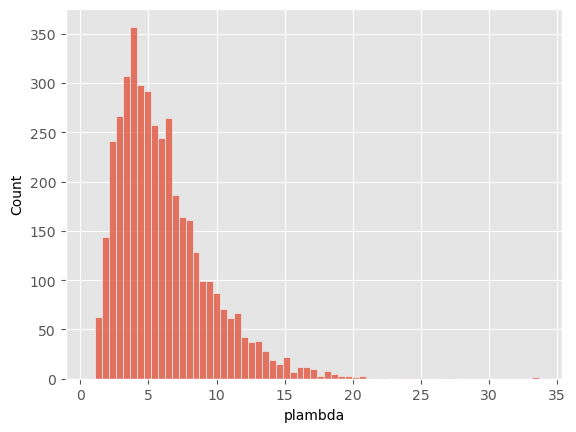

In [31]:
df_mensual['plambda'] = poisson.mu
sns.histplot(data=df_mensual, x="plambda")

In [32]:
aux=((y2-poisson.mu)**2-poisson.mu)/poisson.mu
auxr=sm.OLS(aux,poisson.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:          Failure_today   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              75.73
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                    4.61e-18
Time:                        23:14:32   Log-Likelihood:                         -8181.8
No. Observations:                4137   AIC:                                  1.637e+04
Df Residuals:                    4136   BIC:                                  1.637e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# forma alternativa para ver si hay sobredispercion,el intento fue fallido pero lo adjunto para que se revise

In [33]:
# Media y varianza de la variable objetivo
mean = df_mensual['Failure_today'].mean()
variance = df_mensual['Failure_today'].var()
print(f"Media: {mean}, Varianza: {variance}")

# Si varianza > media -> Sobredispersión
if variance > mean:
    print("¡Sobredispersión detectada! Usa Binomial Negativa.")

Media: 6.132221416485375, Varianza: 18.01612062020884
¡Sobredispersión detectada! Usa Binomial Negativa.


R:
Para responder la pregunta 7, se siguió el mismo procedimiento que en la pauta. Se utilizó una variable auxiliar para estimar el parámetro $\alpha = e^{0.0337} \approx 1.003$, lo que indica que existe sobredispersión, pero esta es muy leve. Esto sugiere que el modelo de Poisson es adecuado. Además, en el gráfico de $\alpha$, se observa que este se asemeja a una distribución de Poisson, ya que no hay una sobredispersión significativa. En conclusión, aunque hay una ligera sobredispersión, esta es mínima, por lo que el modelo de Poisson se ajusta bien a los datos.

No se descarta que la leve sobredispersión observada pueda deberse a que no se incluyó algún parámetro relevante en el modelo. Es posible que las variables correspondientes a las 9 a.m., aunque correlacionadas con las de las 3 p.m., sean estadísticamente significativas y, de ser incluidas, podrían reducir el valor de $\alpha$. También existe la posibilidad de que no se haya tenido el suficiente cuidado al tratar los datos durante la etapa de agrupación previa al ajuste del modelo, lo que podría haber influido en los resultados.



# 8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

Cabe señalar que fue necesario estandarizar las variables independientes, ya que sin esto el modelo binomial negativo no lograba converger. No obstante, se volvió a correr el modelo de Poisson utilizando también las variables estandarizadas, y se comprobó que esto no afectó en absoluto sus resultados, obteniéndose los mismos coeficientes y el mismo valor de $\alpha$.

Además, se observó que el modelo binomial negativo entregó un valor de $\alpha$ muy similar al estimado bajo el modelo de Poisson, lo que refuerza la conclusión de que la sobredispersión es mínima y que el modelo de Poisson se ajusta adecuadamente a los datos.


In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_mensual_e = df_mensual.copy()
# Lista de variables predictoras (covariables)
predictors = ['Min_Temp',  'Parameter1_Speed', 'Parameter3_3pm', 'Parameter4_3pm', 'Parameter5_3pm']

# Estandarización (media=0, std=1)
scaler = StandardScaler()
df_mensual_e[predictors] = scaler.fit_transform(df_mensual[predictors])

In [35]:
import statsmodels.api as sm

# Variable dependiente
y2 = df_mensual_e['Failure_today']

# Variables independientes: eliminamos 'Mes' (índice temporal) y 'Failure_today' (objetivo)
X2 = df_mensual_e.drop(['Mes', 'Failure_today','Location','Max_Temp','Parameter7_9am','Parameter7_3pm','Parameter4_9am','Parameter5_9am','Evaporation','Parameter3_9am','Electricity','Parameter6_9am','Parameter6_3pm','Parameter6_9am_is_nan','plambda'], axis=1)



# Agregamos constante para el modelo
X2 = sm.add_constant(X2)

# Ajustamos modelo Poisson
poisson_e = sm.GLM(y2, X2, family=sm.families.Poisson()).fit()

# Mostramos resumen
print(poisson_e.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:          Failure_today   No. Observations:                 4137
Model:                            GLM   Df Residuals:                     4128
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9678.9
Date:                Thu, 24 Apr 2025   Deviance:                       5618.5
Time:                        23:14:32   Pearson chi2:                 5.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8203
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.75

In [36]:
aux_e=((y2-poisson_e.mu)**2-poisson_e.mu)/poisson_e.mu
auxr_e=sm.OLS(aux_e,poisson_e.mu).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:          Failure_today   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              75.73
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                    4.61e-18
Time:                        23:14:32   Log-Likelihood:                         -8181.8
No. Observations:                4137   AIC:                                  1.637e+04
Df Residuals:                    4136   BIC:                                  1.637e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: xlabel='plambda', ylabel='Count'>

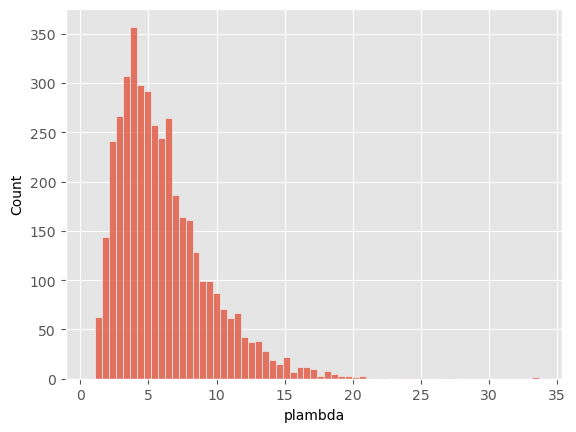

In [37]:
df_mensual_e['plambda'] = poisson_e.mu
sns.histplot(data=df_mensual_e, x="plambda")

In [38]:
# Ajustar modelo Binomial Negativa preliminar
fromula_binomial = 'Failure_today ~ Min_Temp + Evaporation_is_nan + Parameter1_Speed + Parameter3_3pm + Parameter4_3pm + Parameter5_3pm +Electricity_is_nan + Parameter6_3pm_is_nan'
model_nb = sm.NegativeBinomial.from_formula(fromula_binomial, data=df_mensual_e, loglike_method='nb2').fit()
print(model_nb.summary())  

Optimization terminated successfully.
         Current function value: 2.327599
         Iterations: 19
         Function evaluations: 23
         Gradient evaluations: 23
                     NegativeBinomial Regression Results                      
Dep. Variable:          Failure_today   No. Observations:                 4137
Model:               NegativeBinomial   Df Residuals:                     4128
Method:                           MLE   Df Model:                            8
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                  0.1591
Time:                        23:14:32   Log-Likelihood:                -9629.3
converged:                       True   LL-Null:                       -11451.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept       

R:
#  Resultados de la Regresión Binomial Negativa

## Información general del modelo

- **Modelo**: Negative Binomial Regression
- **Variable dependiente**: `Failure_today` (número de fallas en el mes)
- **Observaciones**: 4137
- **Grados de libertad del modelo**: 8
- **Log-Likelihood**: -9629.3
- **Pseudo R²**: 0.1591 → El modelo explica el 15.9% de la variabilidad.
- **LLR p-value**: 0.000 → El modelo completo es estadísticamente significativo.

---

##  Coeficientes e interpretación

> Los coeficientes indican el cambio en el **logaritmo** del número esperado de fallas. la se realiza interpretarlos como razones de incidencia, aplica `exp(coef)`.
###  Ejemplo:

por ejemplo el `Parameter4_3pm` tiene un coeficiente de `0.5998`:

\[
\exp(0.5998) \approx 1.821
\]

Eso significa que **por cada unidad que aumenta `Parameter4_3pm`**, el número esperado de fallas **se multiplica por 1.82** (es decir, **aumenta en un 82%**).



| Variable                  | Coef.   | P-valor | Interpretación |
|--------------------------|---------|--------|----------------|
| **Intercept**            | 1.7453  | 0.000  | Valor base del log de fallas cuando las otras variables son cero. |
| **Min_Temp**             | -0.0176 | 0.058  | Marginalmente no significativo. Temperaturas mínimas más bajas tienden a asociarse con menos fallas. |
| **Evaporation_is_nan**   | -0.0508 | 0.060  | Marginalmente no significativa. La ausencia del dato de evaporación podría relacionarse con menos fallas. |
| **Parameter1_Speed**     | 0.2564  | 0.000  | Significativo. A mayor velocidad, aumentan las fallas. |
| **Parameter3_3pm**       | -0.2230 | 0.000  | A mayores valores de este parámetro a las 3pm, disminuyen las fallas. |
| **Parameter4_3pm**       | 0.5998  | 0.000  | Muy significativo. A mayor valor, se incrementan las fallas considerablemente. |
| **Parameter5_3pm**       | -0.0872 | 0.000  | Efecto negativo. Este parámetro reduce la probabilidad de fallas. |
| **Electricity_is_nan**   | -0.1103 | 0.000  | La ausencia del dato eléctrico está asociada con menos fallas. |
| **Parameter6_3pm_is_nan**| -0.0684 | 0.000  | La ausencia de este parámetro también está asociada con menos fallas. |
| **alpha** (dispersión)   | 0.0357  | 0.000  | El valor del parámetro **alpha** indica una **sobredispersión leve pero muy reducida**, lo cual sugiere que el uso del modelo binomial negativo podría no el mas adecuado. En este caso, un modelo de Poisson es mejor ya que se ajusta mejor a los datos. Además, el valor óptimo alpha para la binomial negatica es muy cercano estimado para el modelo de Poisson (alpha_poisson:$\alpha = e^{0.0337} \approx 1.003$ y alpha_binomial negativa:$\alpha = e^{0.0357} \approx 1.003$ ), lo que valida el procedimiento realizado y refuerza la consistencia de los resultados obtenidos.. |

---





# 9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?
Los resultados obtenidos en las preguntas 6, 7 y 8 fueron fundamentales para comprender mejor las distribuciones involucradas. Los resultados fueron muy satisfactorios, ya que se pudo validar con el valor de **alpha** obtenido en la regresión binomial negativa que el procedimiento realizado es sólido, aunque con posibilidad de mejoras,quizas no se agregaron todas las variables necesarias o se trato con poco cuidado al momento de agrupar,dado que son muchas variables y muchas combinaciones de factores es plausible que se haya podido trabajar mejor,haciendo que los mdelos de la pregunta 6 y 8 tuvieron menor sobredisperccion y quizas haber llegado a un **alpha** igual a 1. En base a esto, se concluyó que las diferencias observadas en los **Pseudo R²** de los dos modelos es debido a que, al no existir una **sobredispersión significativa** (solo leve), los datos se ajustan mejor a un modelo de **Poisson**.

Por lo tanto, se concluye que, para la pregunta de investigación, es más adecuado utilizar un modelo de **Poisson**, como se explicó previamente. Además, la mayoría de las variables seleccionadas resultaron robustas. Sin embargo, algunas, como `Min_Temp`, podrían cambiar dependiendo del caso, siendo el único modelo donde no resultó robusta el de la **regresión binomial negativa**.


# Notas adicionale:

# Reflexión sobre el trabajo

## Parte 1

### 1. Variables categóricas en las preguntas 2, 3 y 4
- Es cierto, como se señaló, que al realizar la categorizacion por trimestre, ya estaban incluidos los meses, por lo tanto estaba en limbo de lo perjudicial.No se alcanzó a corregir este punto por falta de tiempo, pero tratando de verlo positivamente, esa desagregación permitió especificar el análisis de manera más acotada, como a nivel mensual.
- Además, a partir de esa conversación, concluí que ninguna variable a nivel diario resultó significativa, ya que las demás variables categóricas temporales ya explicaban suficientemente esa dimensión temporal.

## Parte 2

### 2. Manejo de datos y agrupación
- Reconozco que el manejo de los datos en esta parte no fue del todo correcto. Si bien el ramo es una instancia para aprender, admito que el proceso de agrupar y calcular promedios por columna podría haberse hecho de una mejor manera.
- A pesar de eso, lo realizado fue un avance significativo en comparación con lo que se hacía inicialmente, que consistía en eliminar datos, algo que no era apropiado ya que no se podía hacer de forma aleatoria, como se discutió en la reunión.
- Por el tiempo limitado, no se logró aplicar un enfoque más óptimo, pero probablemente habría sido mejor primero reemplazar los valores *NaN* por 0, y luego, si había un valor igual a 1, agrupar a partir de eso.

### 3. Análisis y comprensión de modelos estadísticos
- Siento que mis análisis en esta segunda parte fueron más simples, ya que comprendí los modelos de Poisson y binomial negativa más desde un enfoque estadístico general, pero no con suficiente profundidad técnica.
- Por ello, me comprometo a estudiar más sobre estos modelos durante el semestre para poder aplicarlos con mayor solidez en el futuro.
